In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, f1_score, mean_absolute_error, accuracy_score, plot_confusion_matrix, precision_score, recall_score
from sklearn import svm
from sklearn.ensemble import BaggingRegressor, BaggingClassifier, RandomForestRegressor, RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('../data/cleaned_engineered_five_states.csv')

In [15]:
data

county_state  total_cases  total_fatalities  \
0      Santa Clara County, California      23978.0             388.0   
1        San Mateo County, California      10942.0             159.0   
2    Santa Barbara County, California       9781.0             120.0   
3         Tuolumne County, California        269.0               4.0   
4           Sierra County, California          6.0               0.0   
..                                ...          ...               ...   
538                Wood County, Texas        626.0              39.0   
539              Yoakum County, Texas        289.0               6.0   
540               Young County, Texas        535.0               8.0   
541              Zapata County, Texas        345.0               9.0   
542              Zavala County, Texas        460.0              18.0   

     death_rate  total_tests  race_pop  \
0      0.016181       839764   1922200   
1      0.014531       285657    765935   
2      0.012269       158693    443738   
3      0.014870        20986     53932   
4      0.000000          641      2930   
..          ...          ...       ...   
538    0.062300         6844     43815   
539    0.020761         1531      8571   
540    0.014953         3363     18114   
541    0.026087         4355     14369   
542    0.039130         2520     12131   

     race_pop_hispanic_or_latino_of_any_race  race_pop_white_alone  \
0                                     495455                615912   
1                                     189002                303047   
2                                     200060                199356   
3                                       6527                 43364   
4                                        324                  2567   
..                                       ...                   ...   
538                                     4313                 36273   
539                                     5643                  2763   
540                                     3332                 14176   
541                                    13542                   615   
542                                    11372                   602   

     race_pop_black_or_african_american_alone  \
0                                       45379   
1                                       16838   
2                                        7881   
3                                         880   
4                                           6   
..                                        ...   
538                                      2335   
539                                        25   
540                                       354   
541                                         0   
542                                        60   

     race_pop_american_indian_and_alaska_native_alone  ...  \
0                                                3003  ...   
1                                                1151  ...   
2                                                1407  ...   
3                                                 747  ...   
4                                                  25  ...   
..                                                ...  ...   
538                                               277  ...   
539                                                11  ...   
540                                               112  ...   
541                                                 0  ...   
542                                                 0  ...   

     percent_race_pop_other  percent_race_pop_minority  \
0                  0.041717                   0.679580   
1                  0.058196                   0.604344   
2                  0.030299                   0.550735   
3                  0.045038                   0.195950   
4                  0.011263                   0.123891   
..                      ...                        ...   
538                0.017368                   0.172133   
539             

In [35]:
states = []
for state in data['county_state']:
    state = state.split(" ")
    states.append(state[-1])
states[:5]

['California', 'California', 'California', 'California', 'California']

In [36]:
len(states)

543

In [37]:
data['state'] = states

In [38]:
data

county_state  total_cases  total_fatalities  \
0      Santa Clara County, California      23978.0             388.0   
1        San Mateo County, California      10942.0             159.0   
2    Santa Barbara County, California       9781.0             120.0   
3         Tuolumne County, California        269.0               4.0   
4           Sierra County, California          6.0               0.0   
..                                ...          ...               ...   
538                Wood County, Texas        626.0              39.0   
539              Yoakum County, Texas        289.0               6.0   
540               Young County, Texas        535.0               8.0   
541              Zapata County, Texas        345.0               9.0   
542              Zavala County, Texas        460.0              18.0   

     death_rate  total_tests  race_pop  \
0      0.016181       839764   1922200   
1      0.014531       285657    765935   
2      0.012269       158693    443738   
3      0.014870        20986     53932   
4      0.000000          641      2930   
..          ...          ...       ...   
538    0.062300         6844     43815   
539    0.020761         1531      8571   
540    0.014953         3363     18114   
541    0.026087         4355     14369   
542    0.039130         2520     12131   

     race_pop_hispanic_or_latino_of_any_race  race_pop_white_alone  \
0                                     495455                615912   
1                                     189002                303047   
2                                     200060                199356   
3                                       6527                 43364   
4                                        324                  2567   
..                                       ...                   ...   
538                                     4313                 36273   
539                                     5643                  2763   
540                                     3332                 14176   
541                                    13542                   615   
542                                    11372                   602   

     race_pop_black_or_african_american_alone  \
0                                       45379   
1                                       16838   
2                                        7881   
3                                         880   
4                                           6   
..                                        ...   
538                                      2335   
539                                        25   
540                                       354   
541                                         0   
542                                        60   

     race_pop_american_indian_and_alaska_native_alone  ...  \
0                                                3003  ...   
1                                                1151  ...   
2                                                1407  ...   
3                                                 747  ...   
4                                                  25  ...   
..                                                ...  ...   
538                                               277  ...   
539                                                11  ...   
540                                               112  ...   
541                                                 0  ...   
542                                                 0  ...   

     percent_race_pop_minority  percent_sex_age_pop_0_to_44  \
0                     0.679580                     0.616108   
1                     0.604344                     0.574618   
2                     0.550735                     0.628797   
3                     0.195950                     0.464307   
4                     0.123891                     0.398294   
..                         ...                          ...   
538                   0.172133         

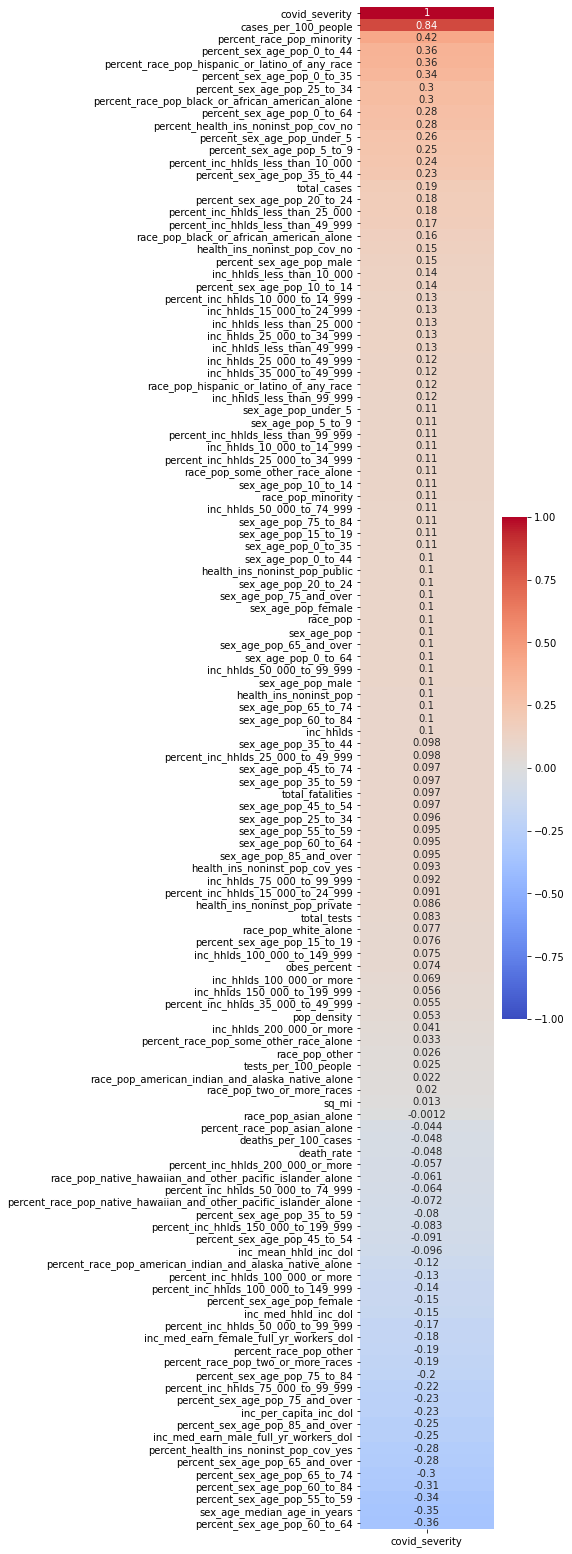

In [39]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr = data.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr[['covid_severity']].sort_values(by='covid_severity', ascending=False).iloc[:-2], 
            vmin=-1, vmax=1, annot=True, cmap = 'coolwarm');

In [40]:
data_no_texas = data[data['state'] != 'Texas']
data_no_texas

county_state  total_cases  total_fatalities  \
0      Santa Clara County, California      23978.0             388.0   
1        San Mateo County, California      10942.0             159.0   
2    Santa Barbara County, California       9781.0             120.0   
3         Tuolumne County, California        269.0               4.0   
4           Sierra County, California          6.0               0.0   
..                                ...          ...               ...   
284       Washington County, New York        332.0              14.0   
285            Wayne County, New York        448.0               3.0   
286      Westchester County, New York      40131.0            1471.0   
287          Wyoming County, New York        182.0               5.0   
288            Yates County, New York        112.0               6.0   

     death_rate  total_tests  race_pop  \
0      0.016181       839764   1922200   
1      0.014531       285657    765935   
2      0.012269       158693    443738   
3      0.014870        20986     53932   
4      0.000000          641      2930   
..          ...          ...       ...   
284    0.042169        33683     61828   
285    0.006696        55940     90856   
286    0.036655       815163    968815   
287    0.027473        24545     40565   
288    0.053571        12413     25009   

     race_pop_hispanic_or_latino_of_any_race  race_pop_white_alone  \
0                                     495455                615912   
1                                     189002                303047   
2                                     200060                199356   
3                                       6527                 43364   
4                                        324                  2567   
..                                       ...                   ...   
284                                     1642                 57178   
285                                     3878                 81906   
286                                   235243                523474   
287                                     1320                 36471   
288                                      549                 23686   

     race_pop_black_or_african_american_alone  \
0                                       45379   
1                                       16838   
2                                        7881   
3                                         880   
4                                           6   
..                                        ...   
284                                      1706   
285                                      2594   
286                                    130640   
287                                      1710   
288                                       207   

     race_pop_american_indian_and_alaska_native_alone  ...  \
0                                                3003  ...   
1                                                1151  ...   
2                                                1407  ...   
3                                                 747  ...   
4                                                  25  ...   
..                                                ...  ...   
284                                               180  ...   
285                                               117  ...   
286                                              1464  ...   
287                                               219  ...   
288                                                16  ...   

     percent_race_pop_minority  percent_sex_age_pop_0_to_44  \
0                     0.679580                     0.616108   
1                     0.604344                     0.574618   
2                     0.550735                     0.628797   
3                     0.195950                     0.464307   
4                     0.123891                     0.398294   
..                         ...                          ...   
284                   0.075209         

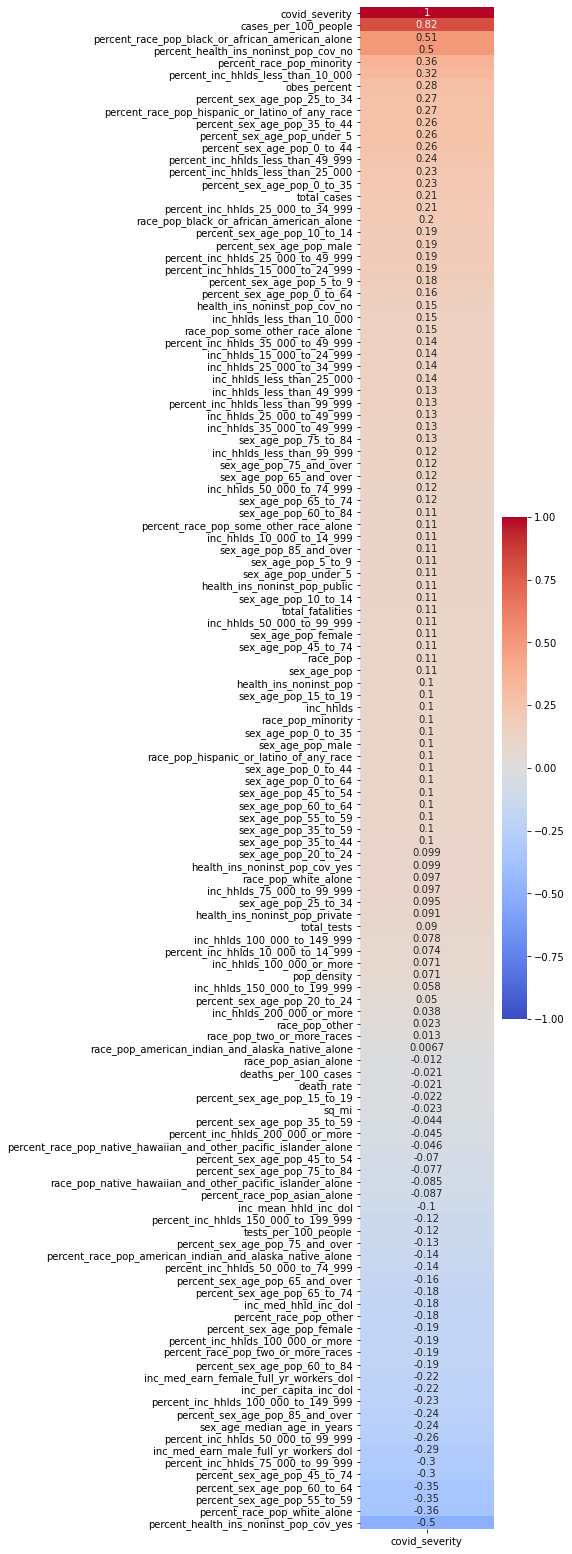

In [48]:
# Visualize the correlation between the variables and 'cases_per_100_people'.
# Save a correlation table to a variable.
corr1 = data_no_texas.corr()

# Display a correlation chart just for Sale Price.
plt.figure(figsize=(3, 28))
sns.heatmap(corr1[['covid_severity']].sort_values(by='covid_severity', ascending=False), 
            vmin=-1, vmax=1, annot=True, cmap = 'coolwarm');

In [46]:
corr1[['covid_severity']].sort_values(by='covid_severity', ascending=False)[:20]

covid_severity
covid_severity                                          1.000000
cases_per_100_people                                    0.817369
percent_race_pop_black_or_african_american_alone        0.507695
percent_health_ins_noninst_pop_cov_no                   0.502986
percent_race_pop_minority                               0.356559
percent_inc_hhlds_less_than_10_000                      0.324122
obes_percent                                            0.276249
percent_sex_age_pop_25_to_34                            0.268130
percent_race_pop_hispanic_or_latino_of_any_race         0.265916
percent_sex_age_pop_35_to_44                            0.263070
percent_sex_age_pop_under_5                             0.261136
percent_sex_age_pop_0_to_44                             0.260013
percent_inc_hhlds_less_than_49_999                      0.236644
percent_inc_hhlds_less_than_25_000                      0.234011
percent_sex_age_pop_0_to_35                             0.229317
total_cases                                             0.212623
percent_inc_hhlds_25_000_to_34_999                      0.208751
race_pop_black_or_african_american_alone                0.203467
percent_sex_age_pop_10_to_14                            0.194827
percent_sex_age_pop_male                                0.188219

In [47]:
corr1[['covid_severity']].sort_values(by='covid_severity', ascending=False)[-20:]

covid_severity
percent_sex_age_pop_65_to_74                  -0.175604
inc_med_hhld_inc_dol                          -0.180641
percent_race_pop_other                        -0.181210
percent_sex_age_pop_female                    -0.188219
percent_inc_hhlds_100_000_or_more             -0.188317
percent_race_pop_two_or_more_races            -0.189751
percent_sex_age_pop_60_to_84                  -0.190187
inc_med_earn_female_full_yr_workers_dol       -0.215595
inc_per_capita_inc_dol                        -0.220305
percent_inc_hhlds_100_000_to_149_999          -0.226367
percent_sex_age_pop_85_and_over               -0.237351
sex_age_median_age_in_years                   -0.242351
percent_inc_hhlds_50_000_to_99_999            -0.261951
inc_med_earn_male_full_yr_workers_dol         -0.292675
percent_inc_hhlds_75_000_to_99_999            -0.295978
percent_sex_age_pop_45_to_74                  -0.303849
percent_sex_age_pop_60_to_64                  -0.347400
percent_sex_age_pop_55_to_59                  -0.348739
percent_race_pop_white_alone                  -0.356559
percent_health_ins_noninst_pop_cov_yes        -0.502986

In [82]:
X = data_no_texas[[
'percent_race_pop_black_or_african_american_alone',
'percent_health_ins_noninst_pop_cov_no',
'percent_race_pop_minority',
'percent_inc_hhlds_less_than_10_000',
'obes_percent',
'percent_sex_age_pop_25_to_34',
'percent_race_pop_hispanic_or_latino_of_any_race',
'percent_sex_age_pop_35_to_44',
'percent_sex_age_pop_under_5',
'percent_sex_age_pop_0_to_44',
'percent_inc_hhlds_less_than_49_999',
'percent_inc_hhlds_less_than_25_000',
'percent_sex_age_pop_0_to_35',
'percent_inc_hhlds_25_000_to_34_999',
'race_pop_black_or_african_american_alone',
'percent_sex_age_pop_10_to_14',
'percent_sex_age_pop_male',

'percent_sex_age_pop_65_to_74',
'inc_med_hhld_inc_dol',
'percent_race_pop_other',
'percent_sex_age_pop_female',
'percent_inc_hhlds_100_000_or_more',
'percent_race_pop_two_or_more_races',
'percent_sex_age_pop_60_to_84',
'inc_med_earn_female_full_yr_workers_dol',
'inc_per_capita_inc_dol',
'percent_inc_hhlds_100_000_to_149_999',
'percent_sex_age_pop_85_and_over',
'sex_age_median_age_in_years',
'percent_inc_hhlds_50_000_to_99_999',
'inc_med_earn_male_full_yr_workers_dol',
'percent_inc_hhlds_75_000_to_99_999',
'percent_sex_age_pop_45_to_74',
'percent_sex_age_pop_60_to_64',
'percent_sex_age_pop_55_to_59',
'percent_race_pop_white_alone',
'percent_health_ins_noninst_pop_cov_yes']
]

y = data_no_texas['covid_severity']

In [114]:
X = data_no_texas[['inc_per_capita_inc_dol',
    'percent_sex_age_pop_male',
    'obes_percent',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_race_pop_asian_alone',
    'percent_inc_hhlds_less_than_99_999',
    'percent_inc_hhlds_100_000_or_more',
    'percent_health_ins_noninst_pop_cov_yes',
    'pop_density',
    'percent_race_pop_white_alone',
    'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
    'percent_race_pop_black_or_african_american_alone',
    'tests_per_100_people']]

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)

In [116]:
ss = StandardScaler()

In [117]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [118]:
classification_models = [
    ['Logistic Regression: ', LogisticRegression()],
    ['K Nearest Neighbour: ', KNeighborsClassifier()], 
    ['Decision Tree: ', DecisionTreeClassifier()], 
    ['Bagging Classifier: ', BaggingClassifier()],
    ['Random Forest Classifier: ', RandomForestClassifier()], 
    ['Ada Boost Classifier: ', AdaBoostClassifier()], 
    ['SUpport Vector Classifier: ', SVC()]
]

In [119]:
precision_scores = []
sensitivity_scores = [] 
accuracy_scores = []

for name, model in classification_models:
    
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    preds = model.predict(X_test_scaled)
    
    print(f'Train score for {name} is {train_score}')
    print(f'Test score for {name} is {test_score}')
    print('Precision Score', precision_score(y_test, preds, average = 'macro'))
    print('Recall Score', recall_score(y_test, preds, average = 'macro'))
    print('Accuracy score', accuracy_score(y_test, preds))
    
    precision_scores.append(precision_score(y_test, preds, average='macro'))
    sensitivity_scores.append(recall_score(y_test, preds, average='macro'))
    accuracy_scores.append(accuracy_score(y_test, preds))

    print('\n')

Train score for Logistic Regression:  is 0.7083333333333334
Test score for Logistic Regression:  is 0.6438356164383562
Precision Score 0.6126262626262626
Recall Score 0.6144841269841269
Accuracy score 0.6438356164383562


Train score for K Nearest Neighbour:  is 0.7685185185185185
Test score for K Nearest Neighbour:  is 0.6301369863013698
Precision Score 0.599128540305011
Recall Score 0.6056547619047619
Accuracy score 0.6301369863013698


Train score for Decision Tree:  is 1.0
Test score for Decision Tree:  is 0.547945205479452
Precision Score 0.5163461538461539
Recall Score 0.5244047619047619
Accuracy score 0.547945205479452


Train score for Bagging Classifier:  is 0.9953703703703703
Test score for Bagging Classifier:  is 0.589041095890411
Precision Score 0.5771749755620723
Recall Score 0.5845238095238096
Accuracy score 0.589041095890411


Train score for Random Forest Classifier:  is 1.0
Test score for Random Forest Classifier:  is 0.6301369863013698
Precision Score 0.58373015873015

In [120]:
dt = DecisionTreeClassifier(random_state=22)

In [169]:
params = {
    'max_depth': [4, 5, 6, 7],
    'min_samples_split': [2, 3, 4, 5, 6],
    'min_samples_leaf': [5, 6, 7, 8],
    'ccp_alpha': [0, 0.00001, 0.0001, 0.001]   
}

In [122]:
grid = GridSearchCV(dt, params)

In [123]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=22),
             param_grid={'ccp_alpha': [0, 1e-05, 0.0001, 0.001],
                         'max_depth': [4, 5, 6],
                         'min_samples_leaf': [5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5]})

In [124]:
grid.best_params_

{'ccp_alpha': 0, 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [125]:
grid.best_score_

0.5744186046511629

In [126]:
print(f'Score on training set: {grid.score(X_train, y_train)}')
print(f'Score on testing set: {grid.score(X_test, y_test)}')

Score on training set: 0.7777777777777778
Score on testing set: 0.6301369863013698


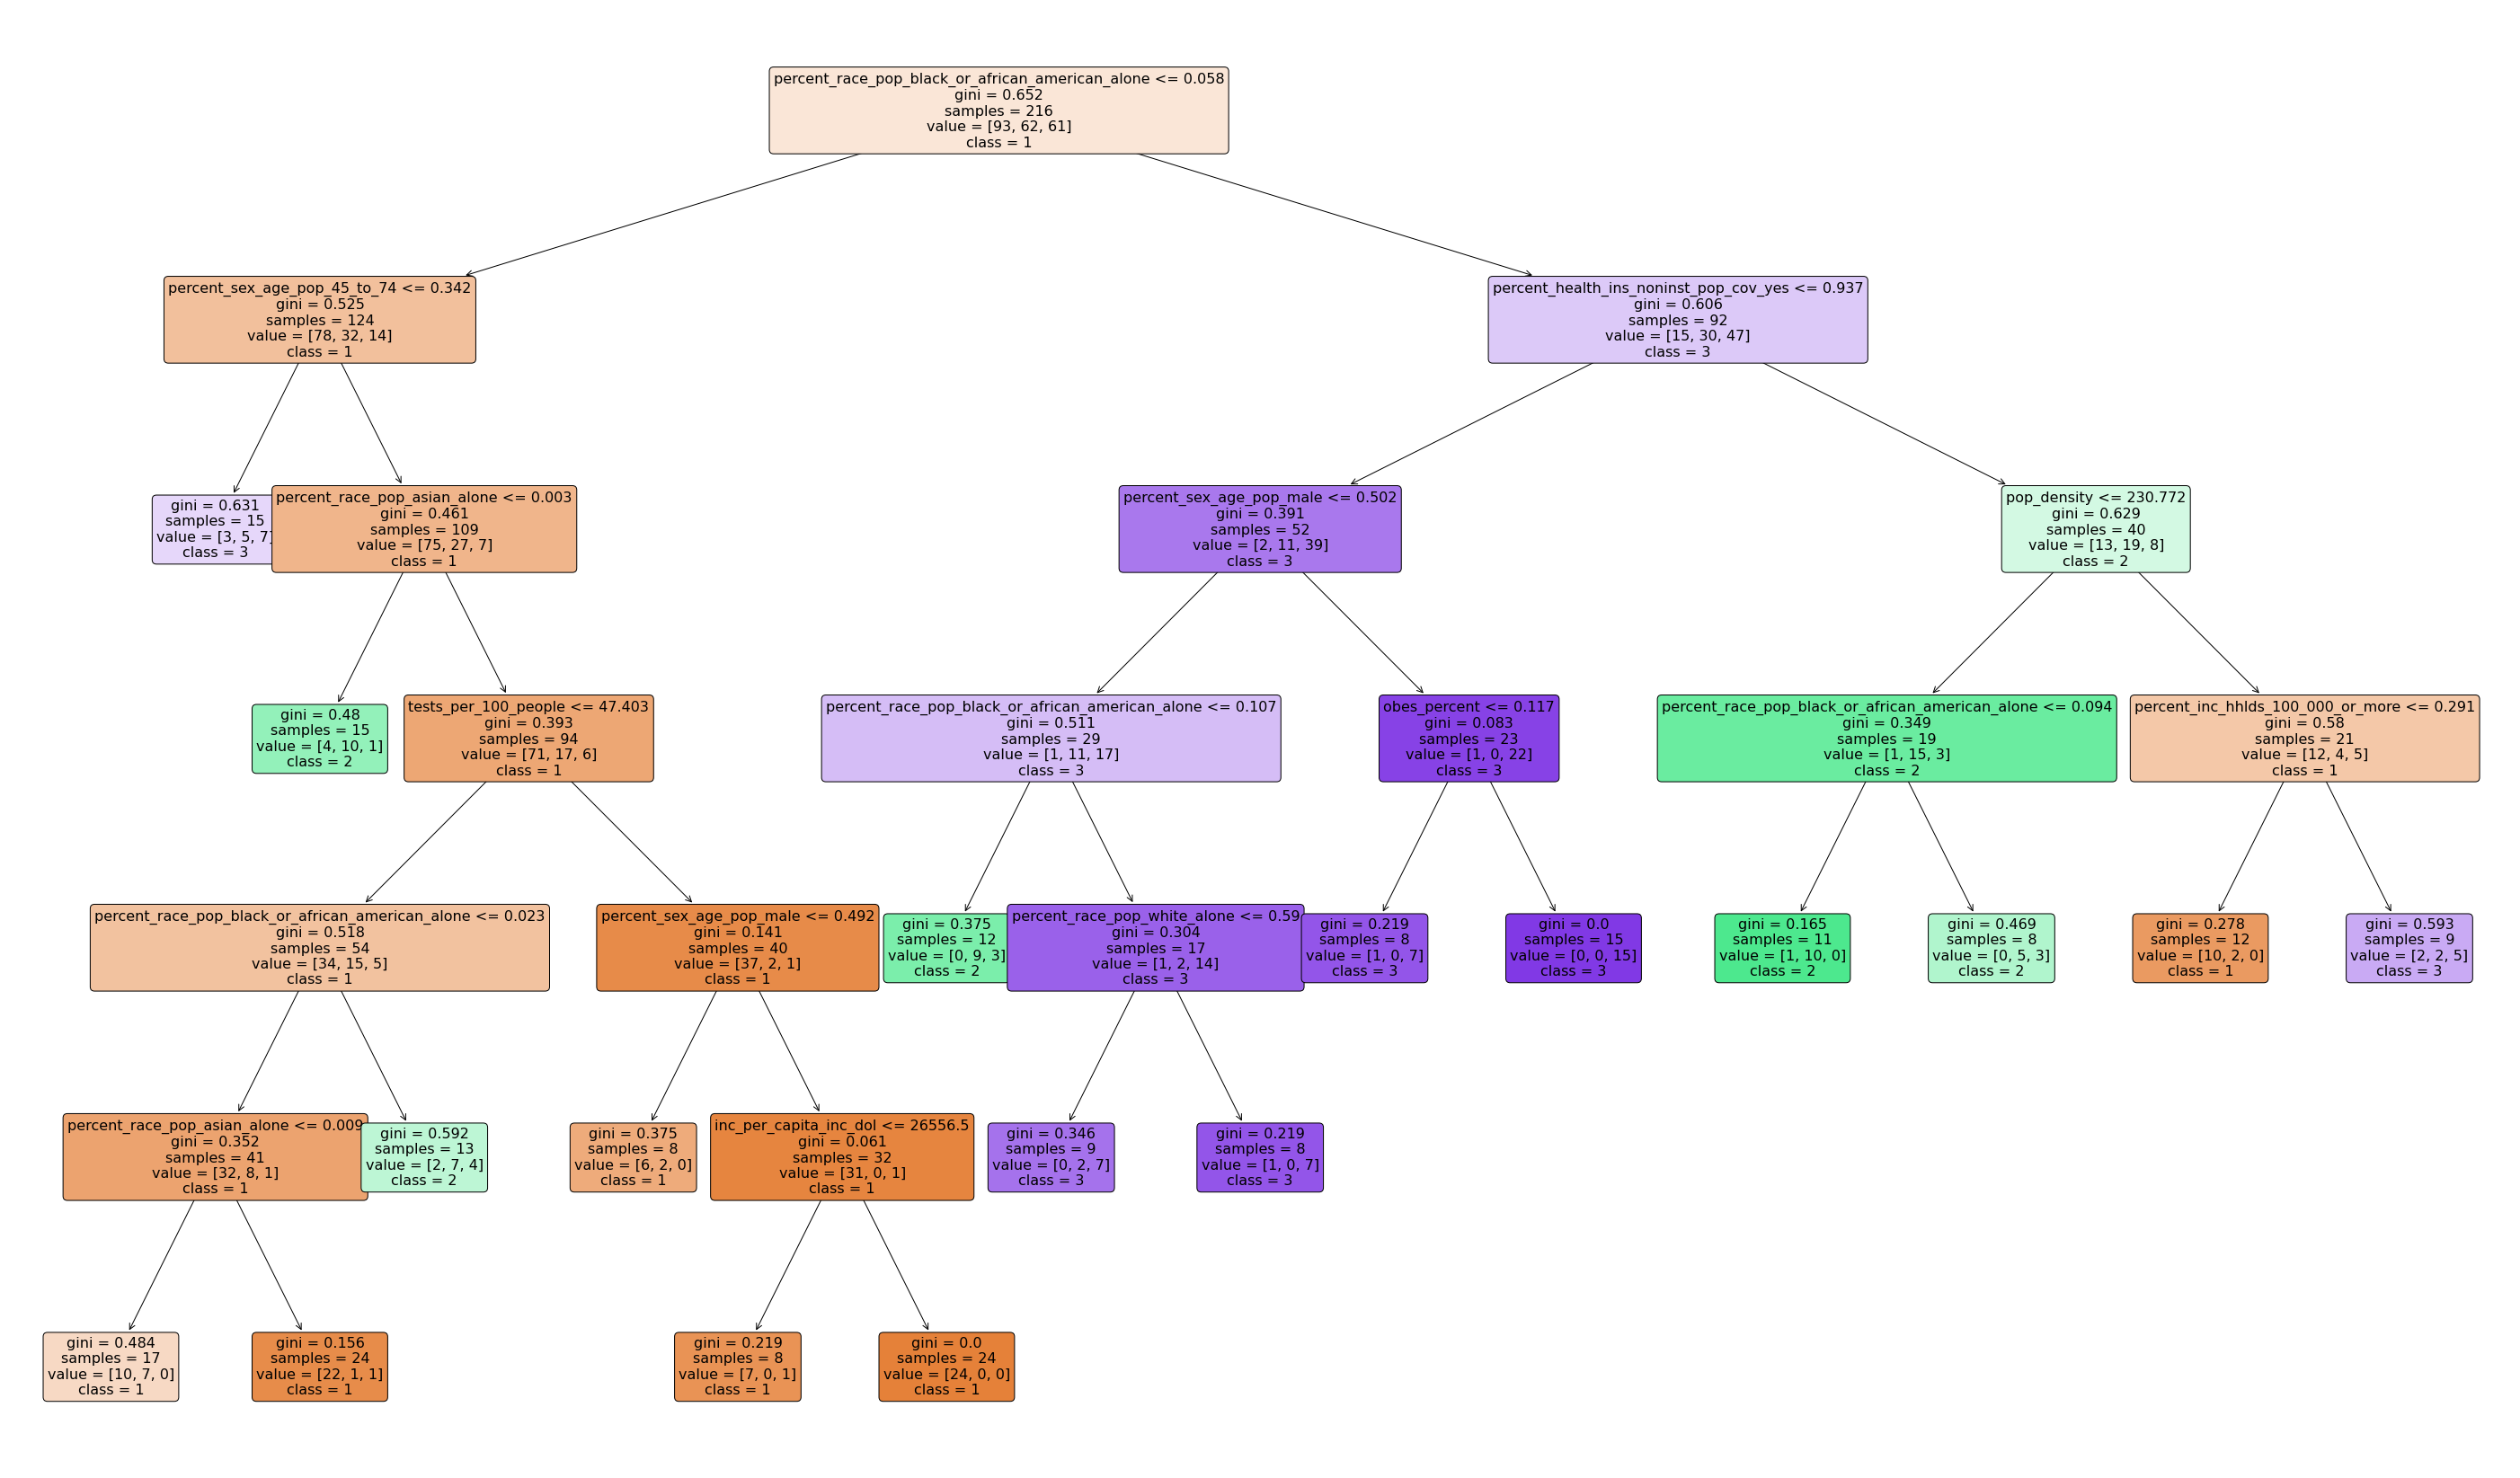

In [149]:
#visualizing the tree

from sklearn.tree import plot_tree

# Establish size of figure.
plt.figure(figsize = (50, 30))

# Plot our tree.
plot_tree(grid.best_estimator_,
          feature_names = X_train.columns,
          class_names = ['1', '2', '3'],
          filled = True,
         fontsize=16,
         rounded=True,
         );
plt.savefig('../tree')

## Decision Tree Classifier

In [188]:
#making a dunction for decision tree
def decision_tree_states(state_name, state_df, params):
    
    '''making a training testing 
    data sets'''
    
    X = state_df[['inc_per_capita_inc_dol',
    'percent_sex_age_pop_male',
    'obes_percent',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_race_pop_asian_alone',
    'percent_inc_hhlds_less_than_99_999',
    'percent_inc_hhlds_100_000_or_more',
    'percent_health_ins_noninst_pop_cov_yes',
    'pop_density',
    'percent_race_pop_white_alone',
    'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
    'percent_race_pop_black_or_african_american_alone',
    'tests_per_100_people']]

    y = state_df['covid_severity']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)
    
    #instantiating decision tree
    dt = DecisionTreeClassifier(random_state=22)
    
    #making gridsearchCV
    grid = GridSearchCV(dt, params)
    grid.fit(X_train, y_train)
    
    print(state_name)
    print(f'Score on training set: {grid.score(X_train, y_train)}')
    print(f'Score on testing set: {grid.score(X_test, y_test)}')
    print('\n')
    
    #visualizing the tree

    from sklearn.tree import plot_tree

    # Establish size of figure.
    plt.figure(figsize = (50, 30))

    # Plot our tree.
    plot_tree(grid.best_estimator_,
              feature_names = X_train.columns,
              class_names = ['1', '2', '3'],
              filled = True,
             fontsize=16,
             rounded=True,
             );
    plt.title(state_name, fontsize=50)
    plt.savefig('../img/tree'+'_'+state_name)

all_no_texas
Score on training set: 0.7777777777777778
Score on testing set: 0.6301369863013698




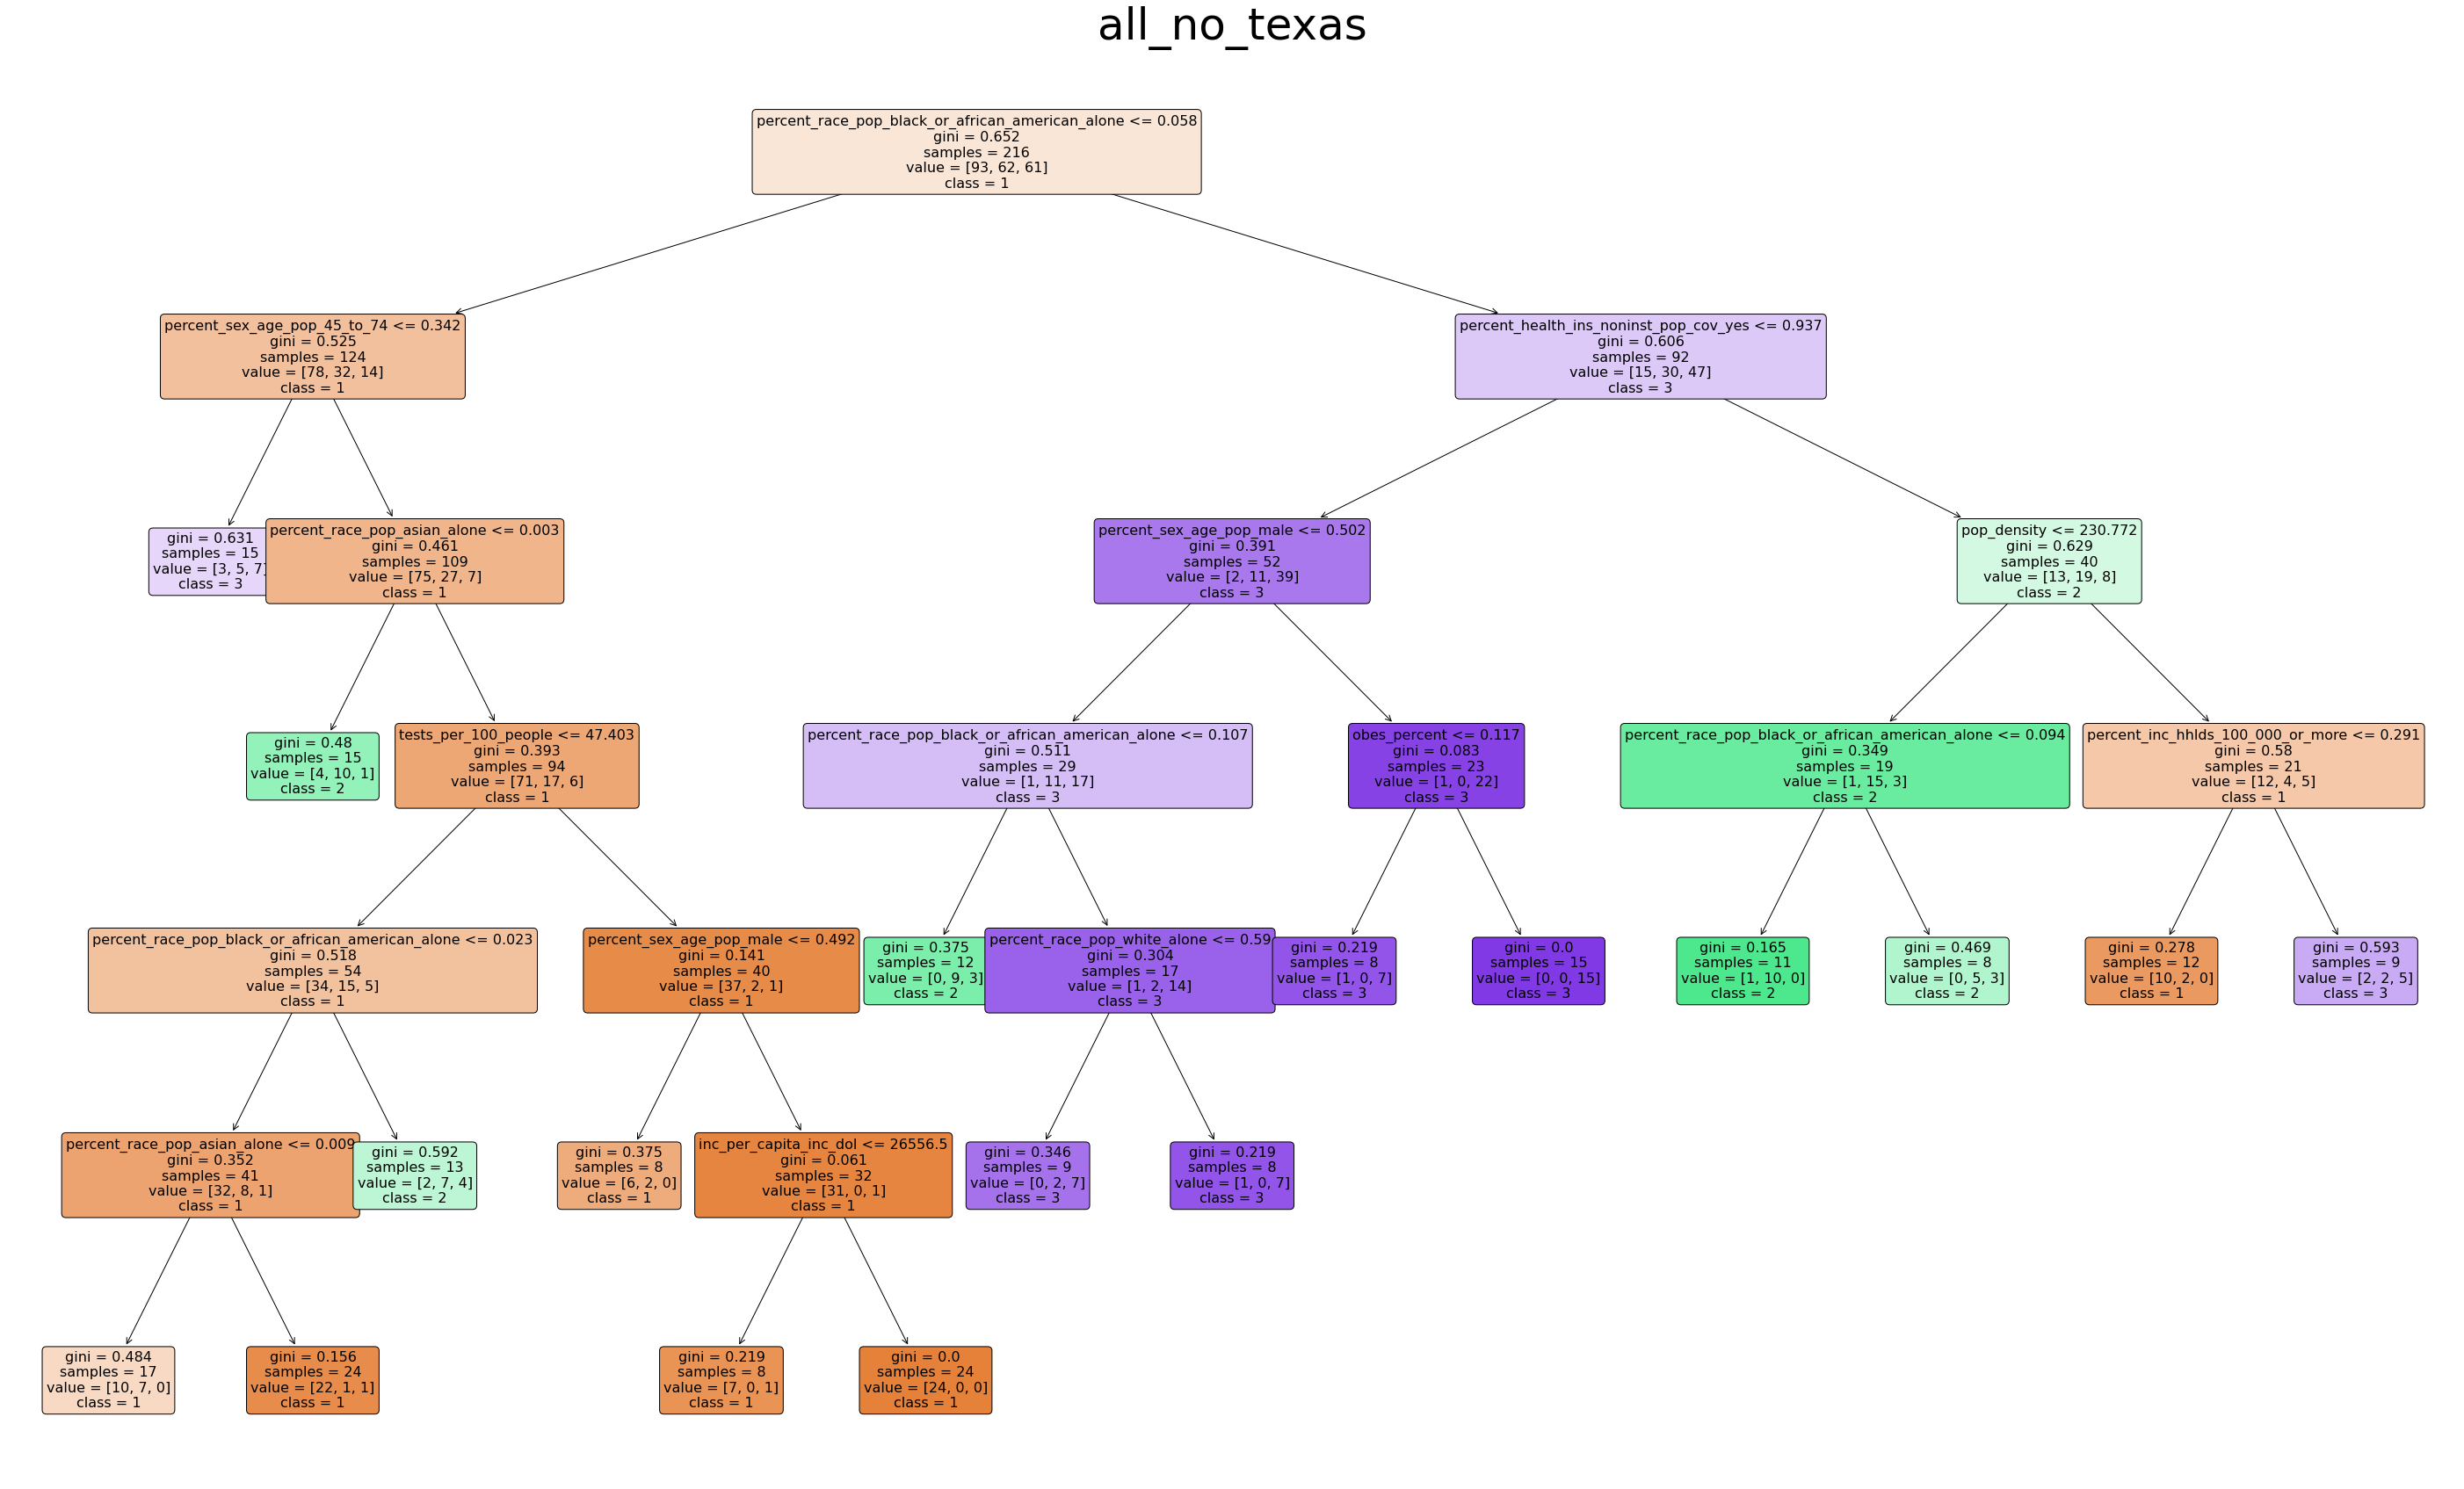

In [189]:
decision_tree_states('all_no_texas', data_no_texas, params)

In [190]:
california = pd.read_csv('../data/cleaned_engineered_ca.csv')
illinois = pd.read_csv('../data/cleaned_engineered_il.csv')
florida = pd.read_csv('../data/cleaned_engineered_fl.csv')
texas = pd.read_csv('../data/cleaned_engineered_tx.csv')
new_york = pd.read_csv('../data/cleaned_engineered_ny.csv')

In [191]:
states = [
    ['california', california], 
    ['illinois', illinois], 
    ['florida', florida], 
    ['texas', texas], 
    ['new_york', new_york]
]

california
Score on training set: 0.9069767441860465
Score on testing set: 0.8666666666666667


illinois
Score on training set: 0.8026315789473685
Score on testing set: 0.38461538461538464


florida
Score on training set: 0.9
Score on testing set: 0.7647058823529411


texas
Score on training set: 0.7210526315789474
Score on testing set: 0.421875


new_york
Score on training set: 0.9565217391304348
Score on testing set: 0.9375




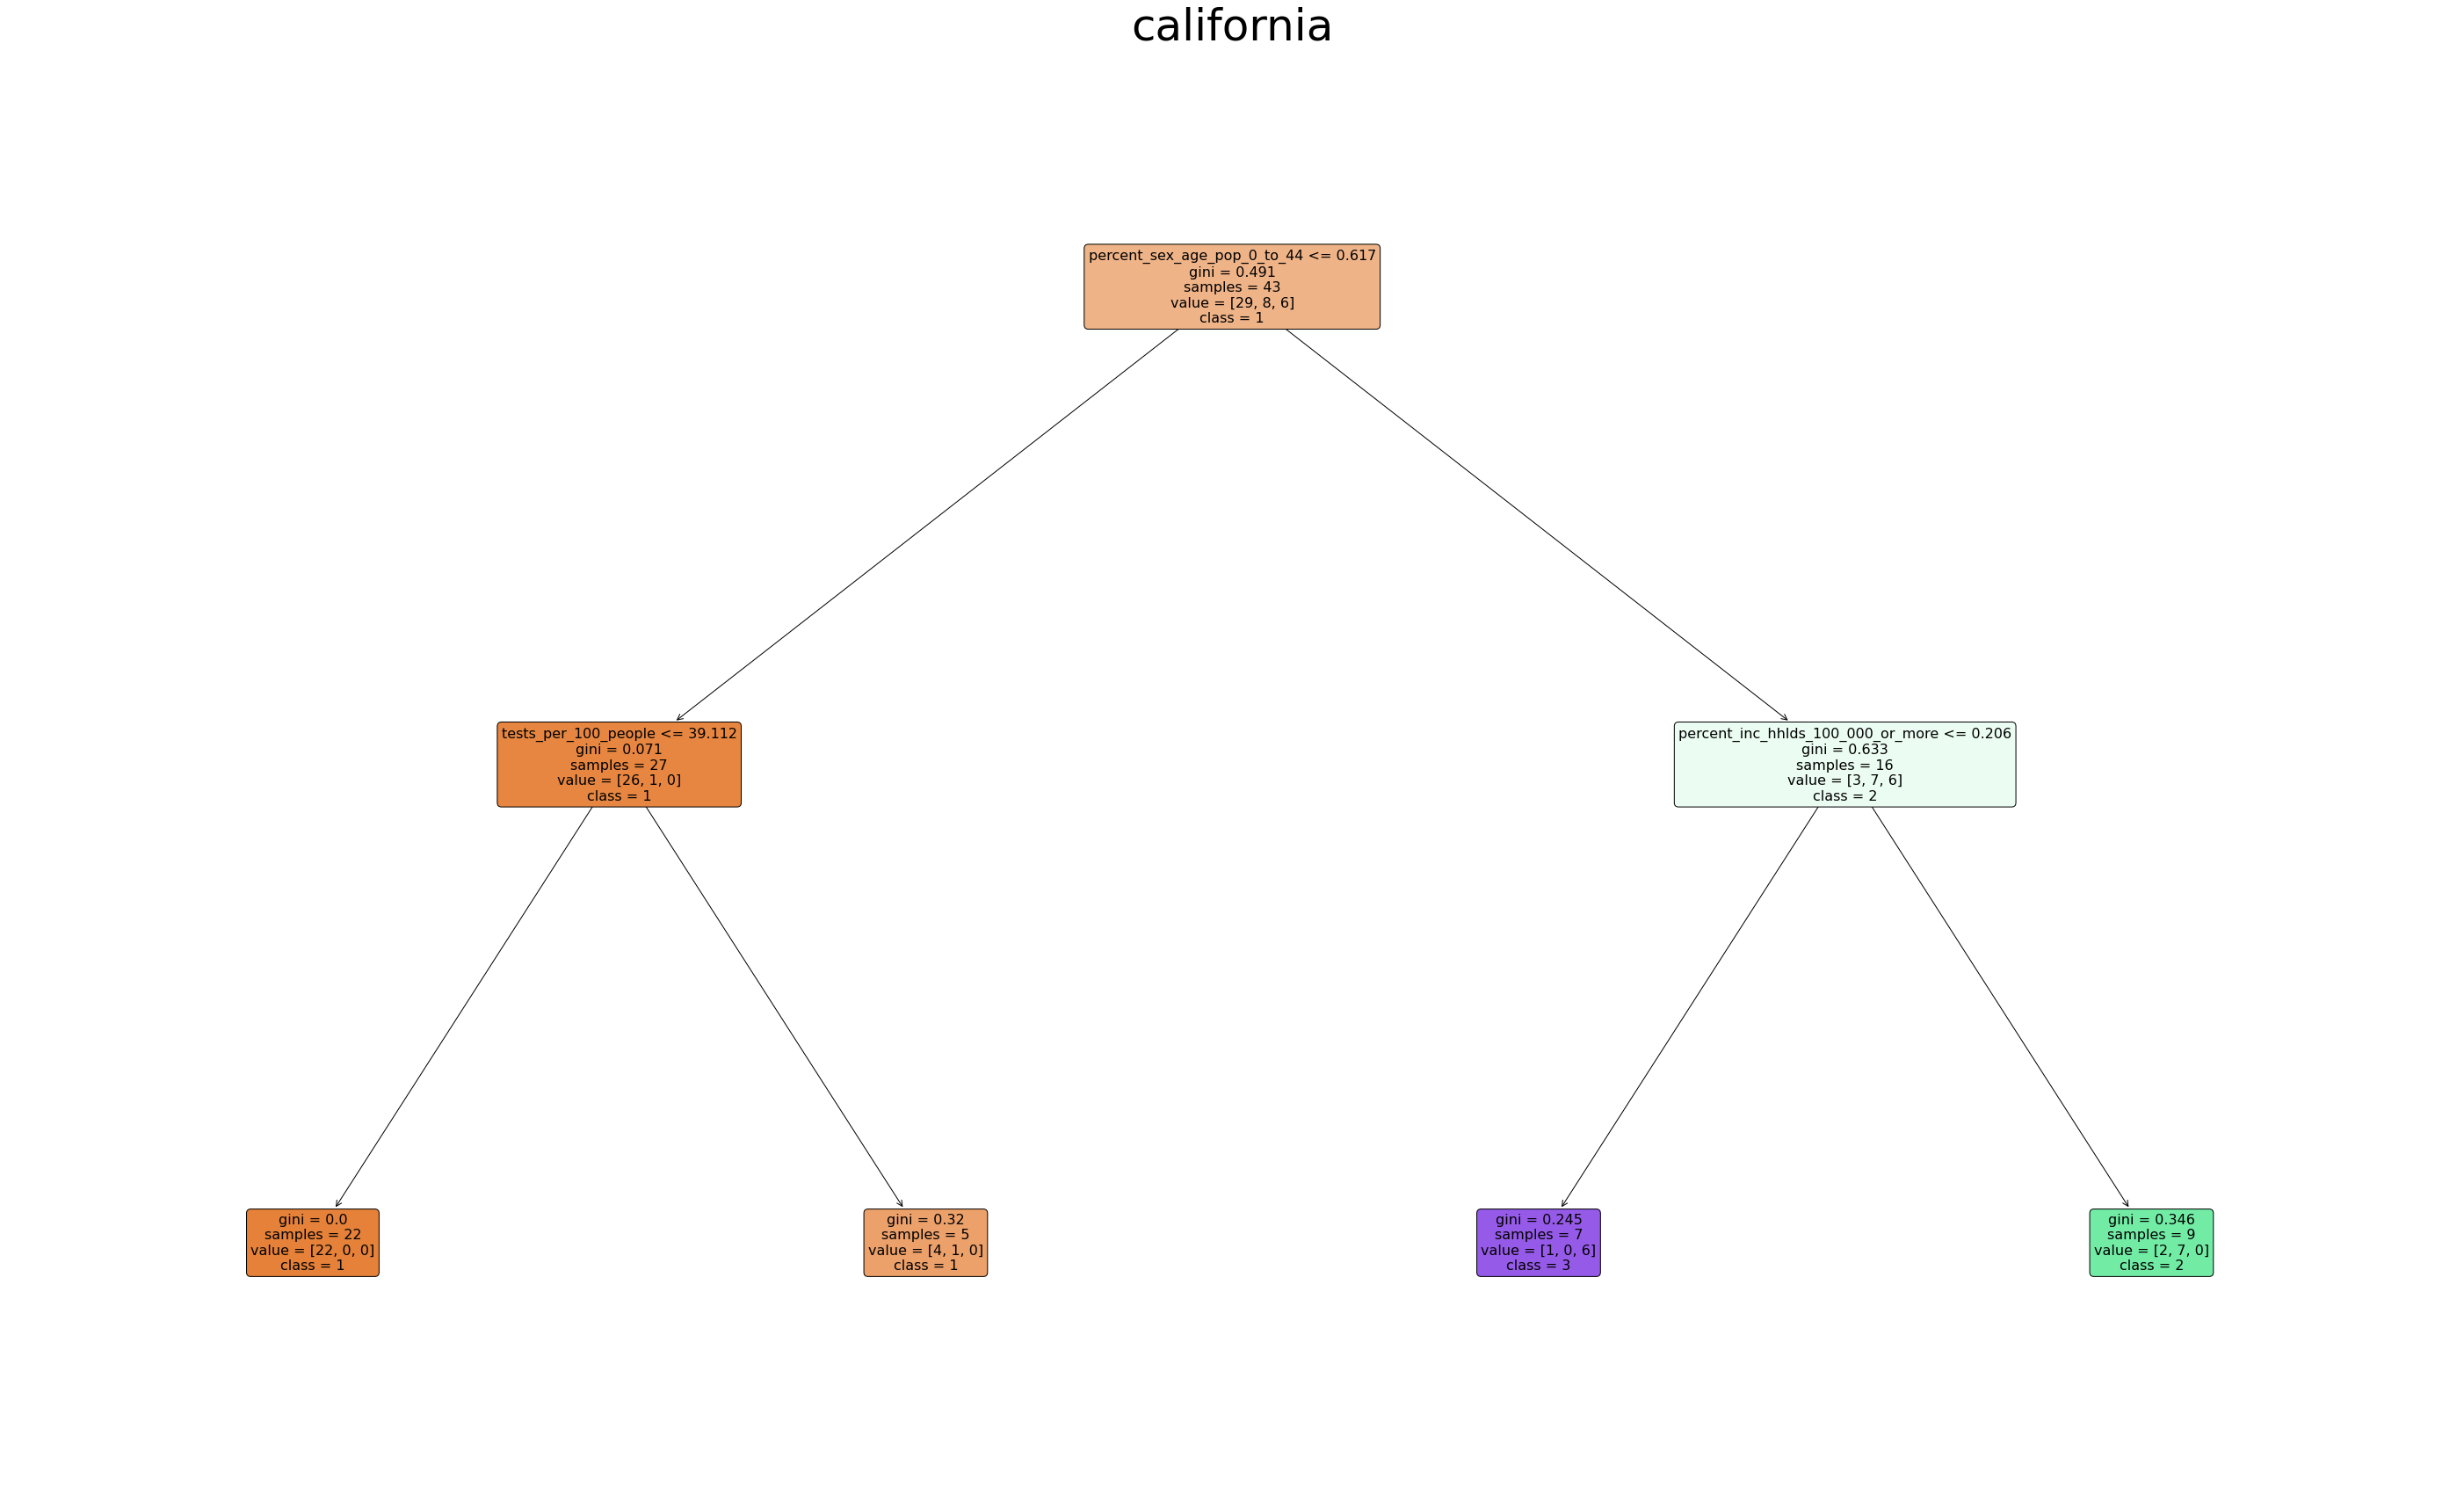

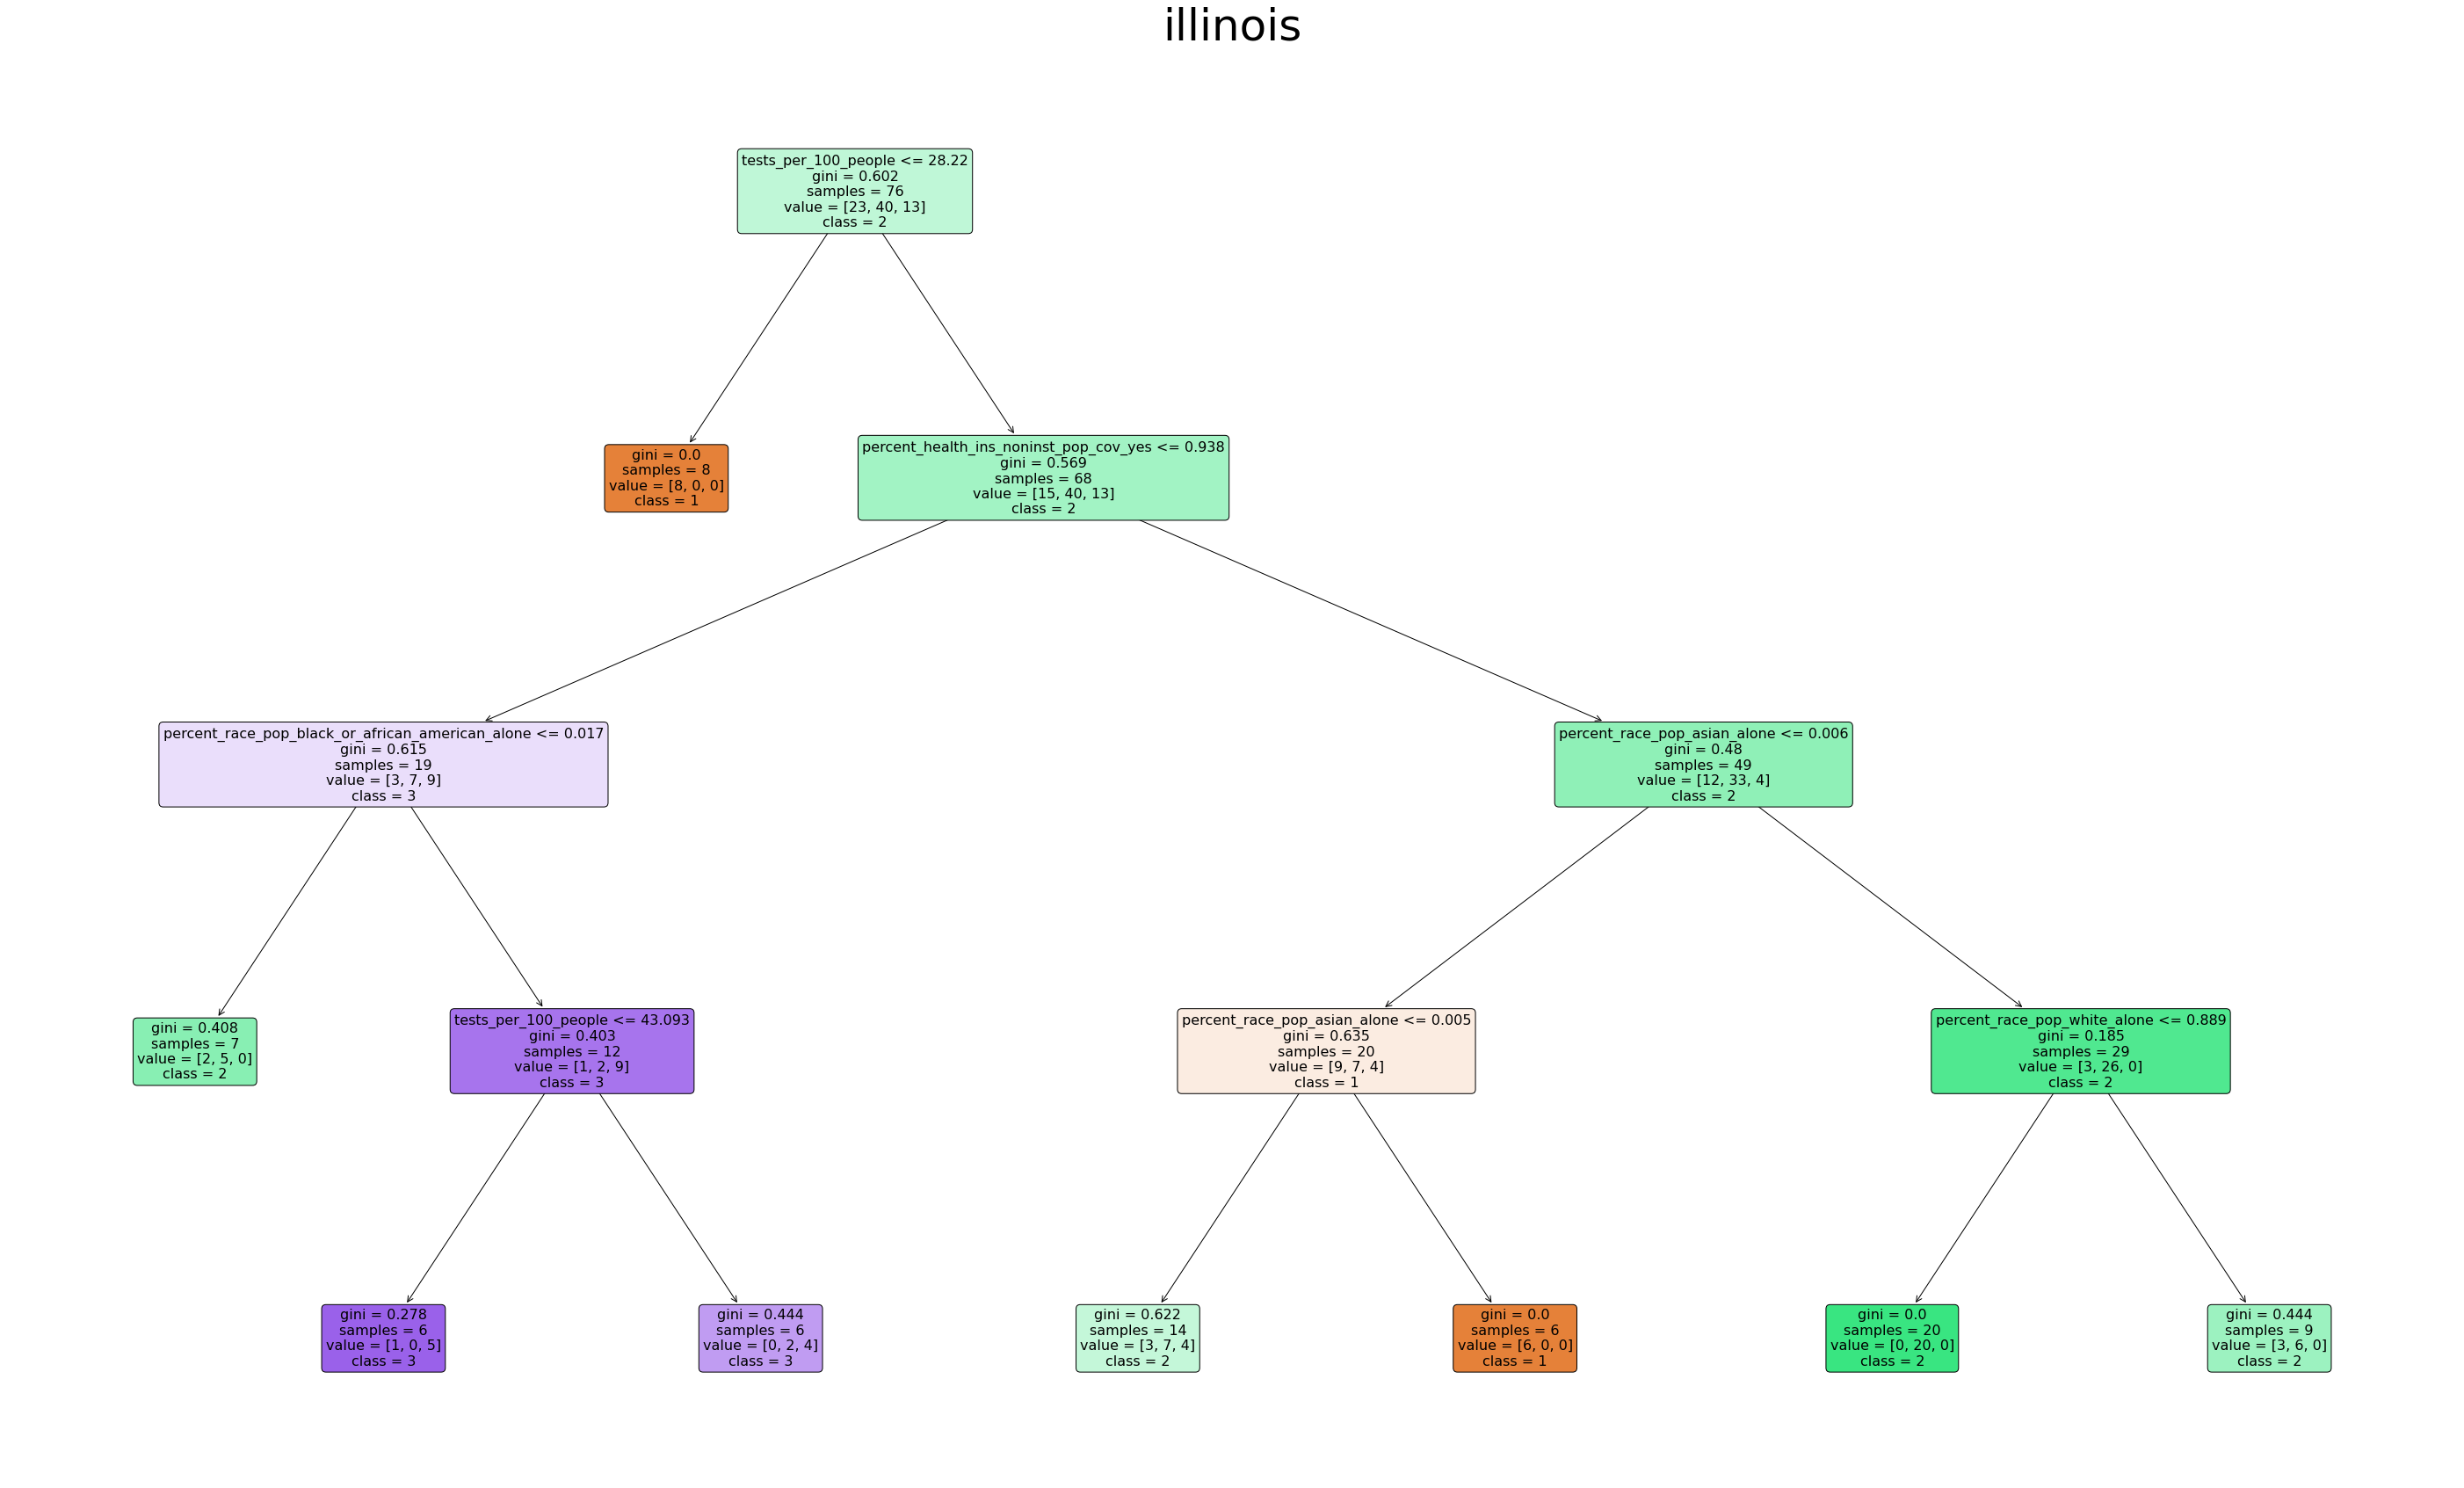

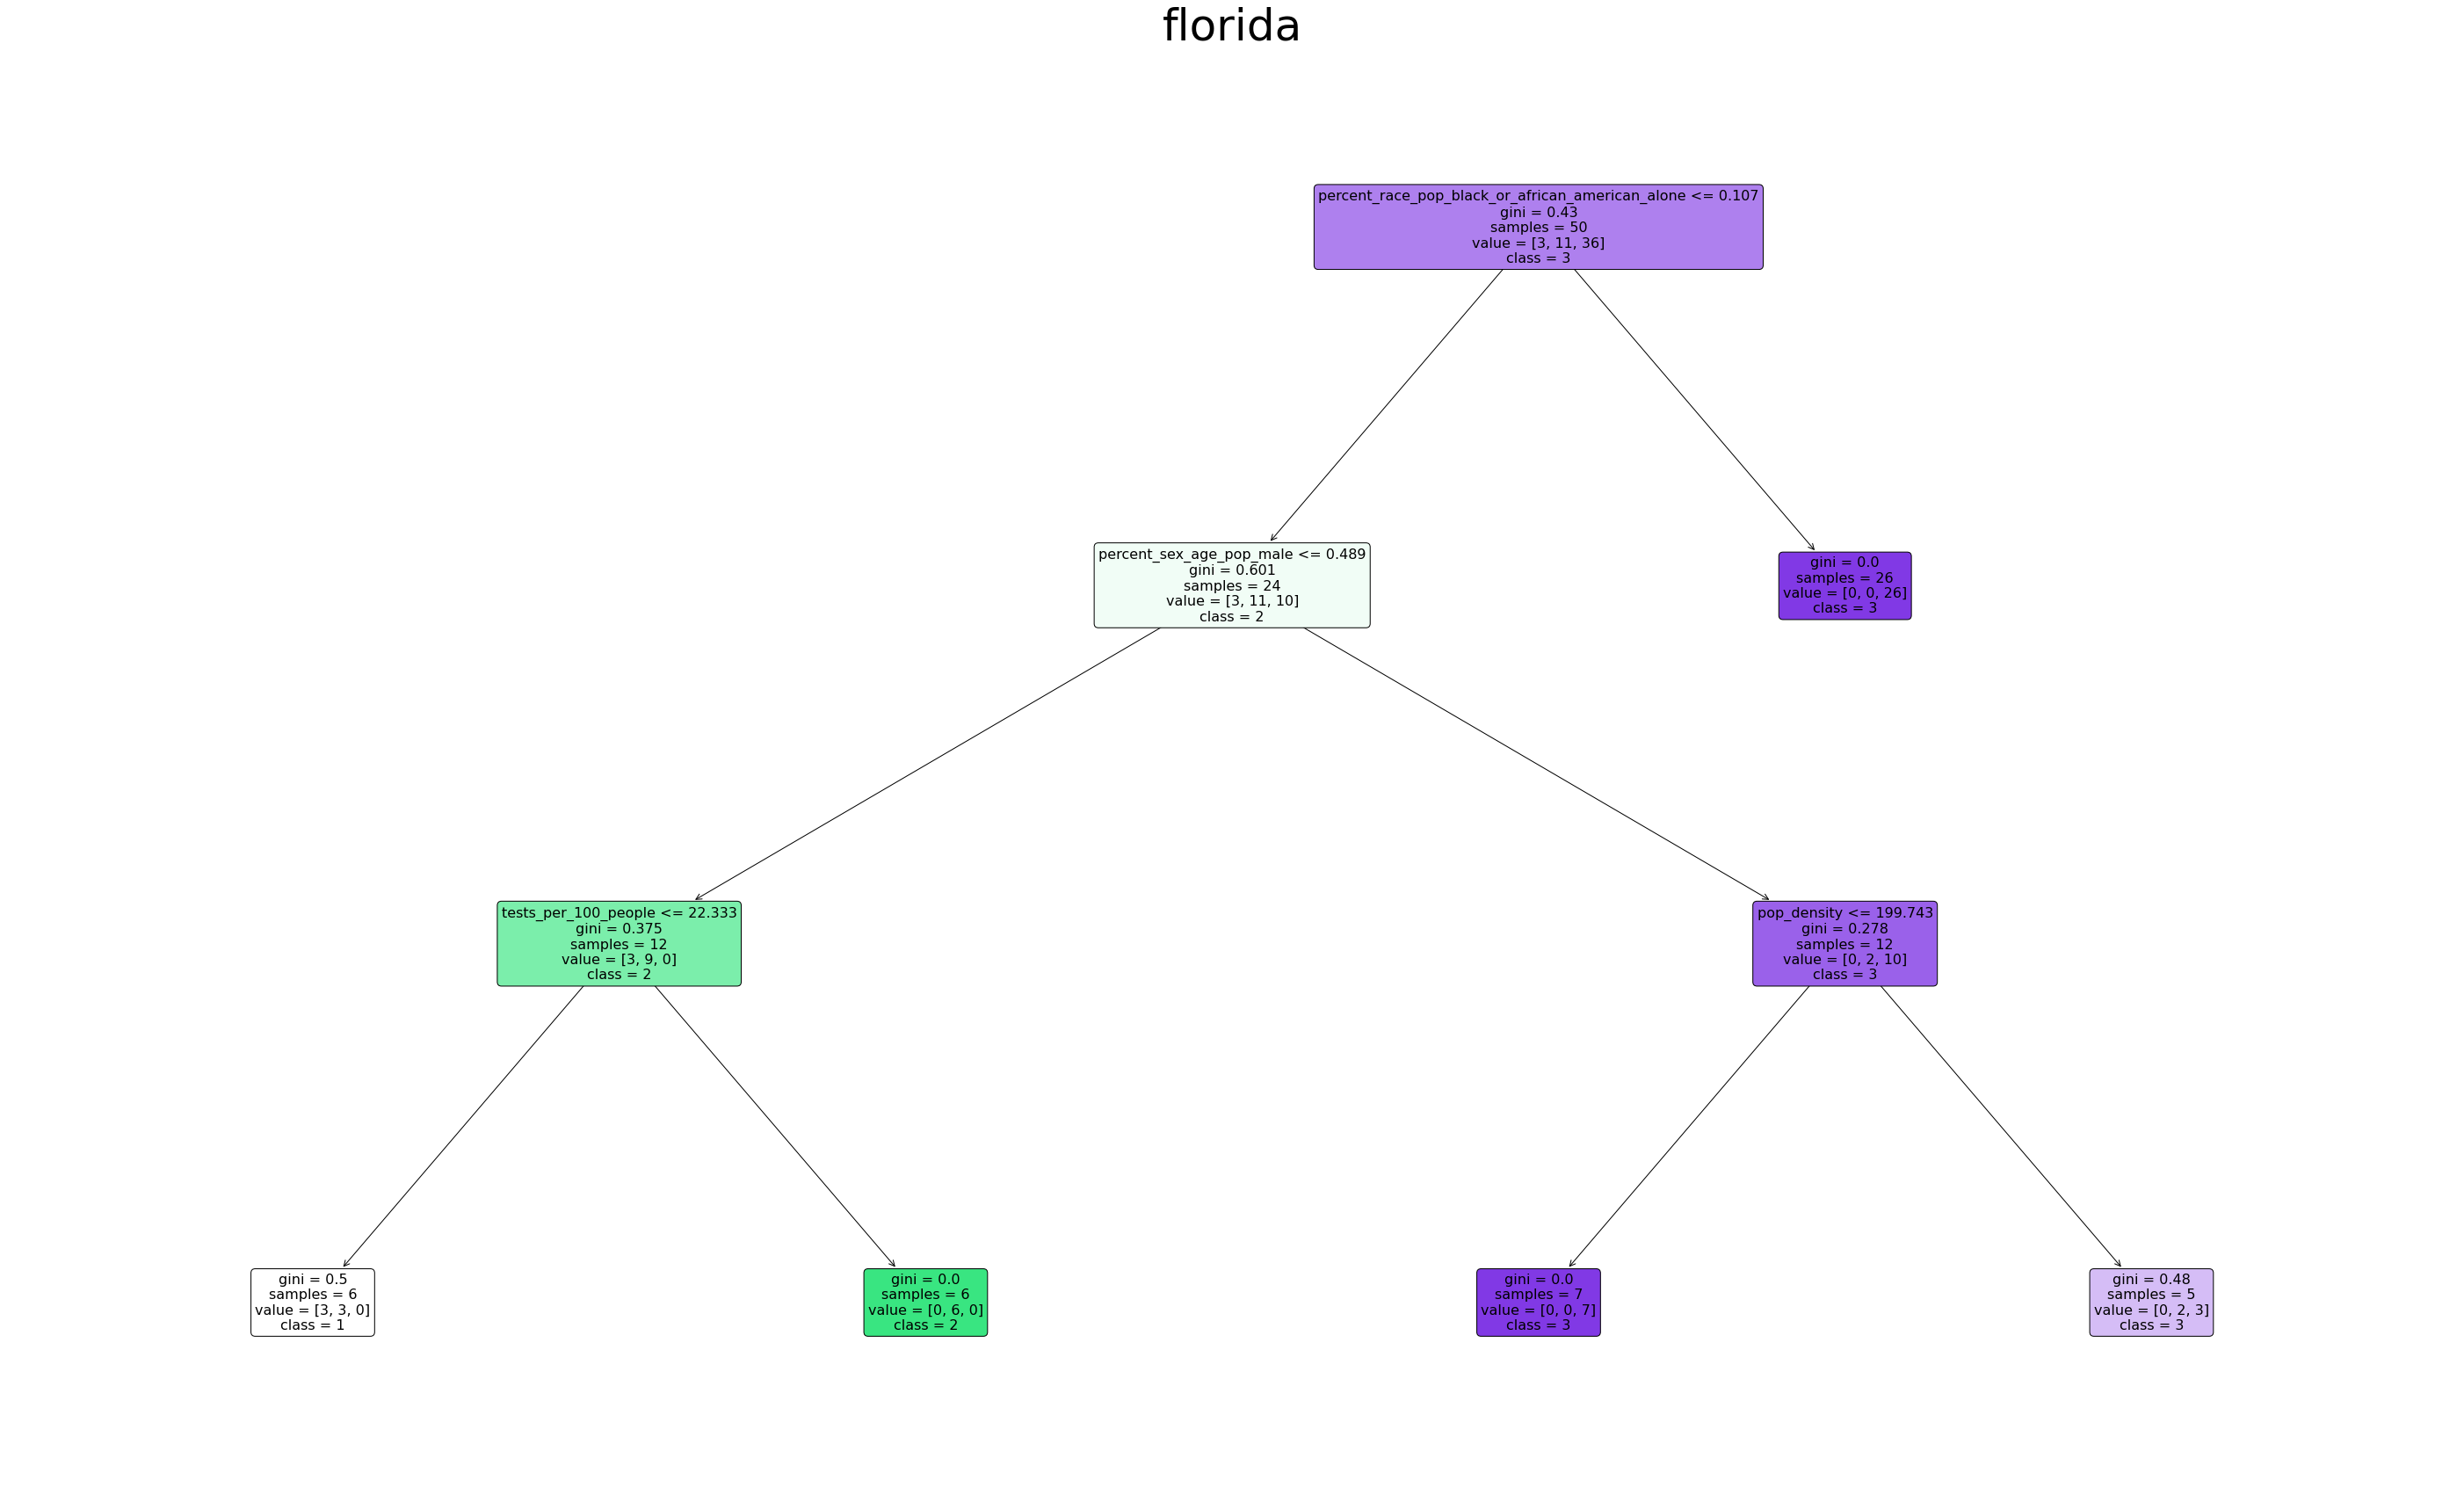

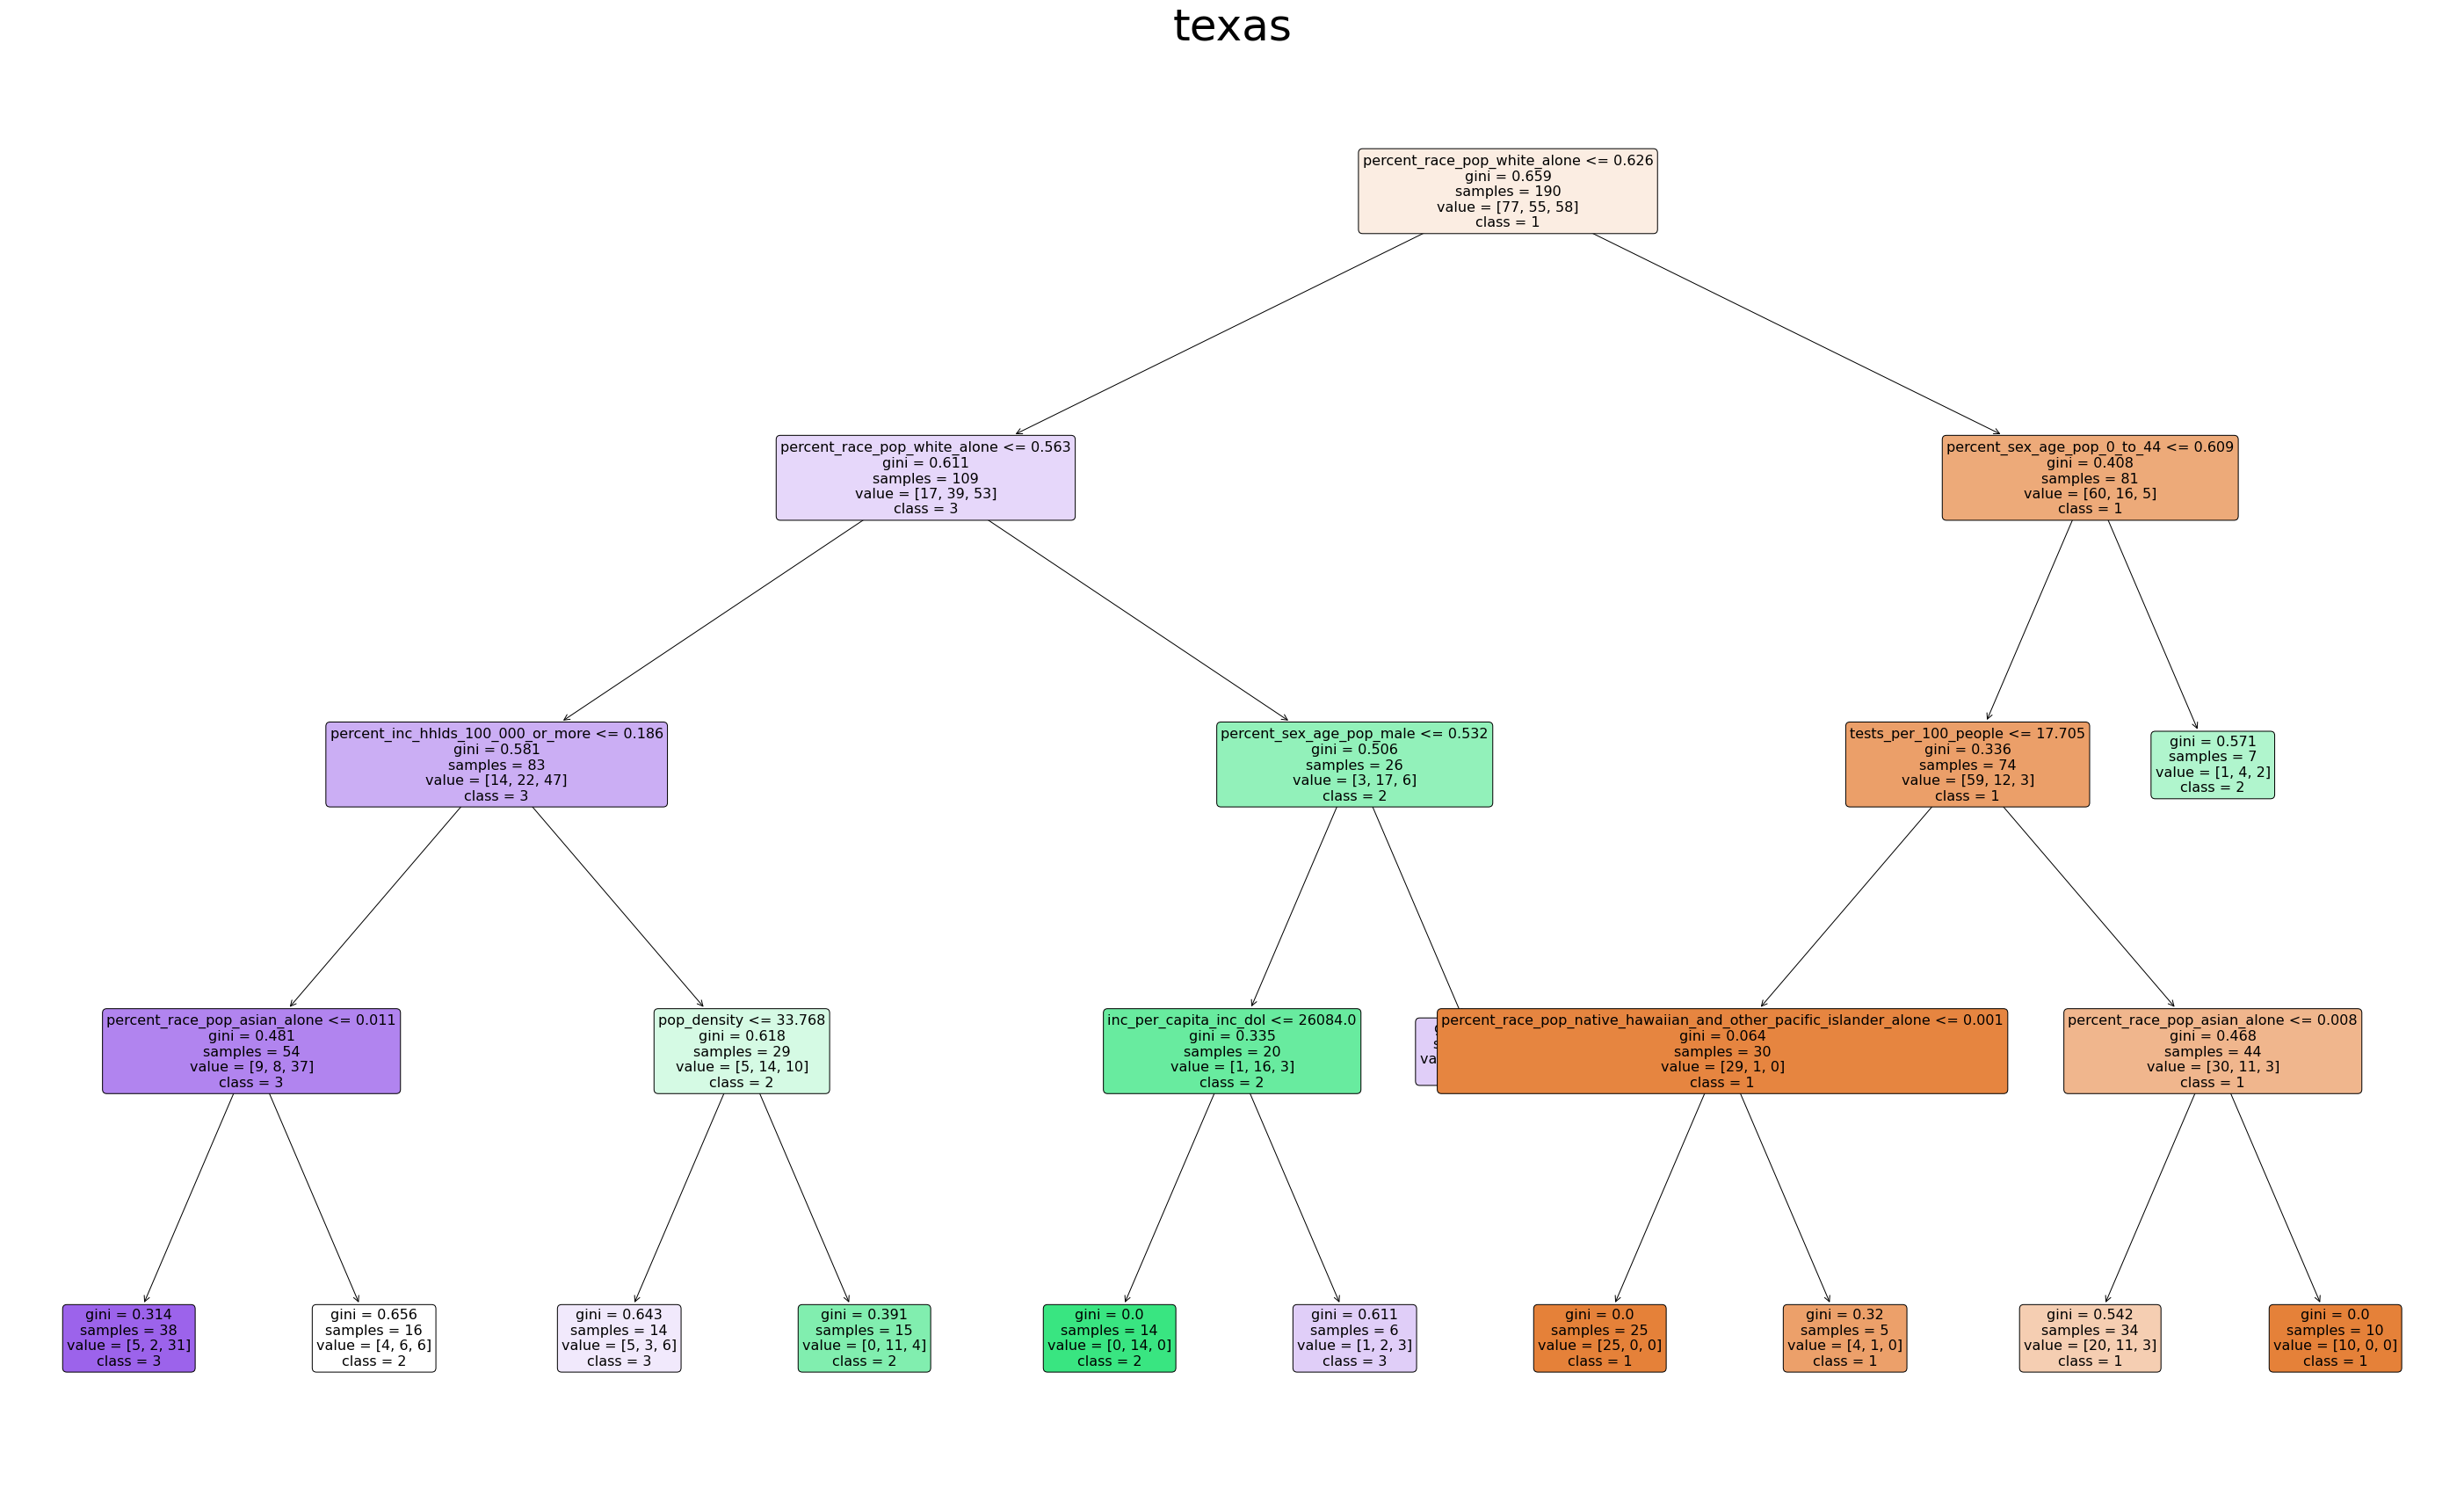

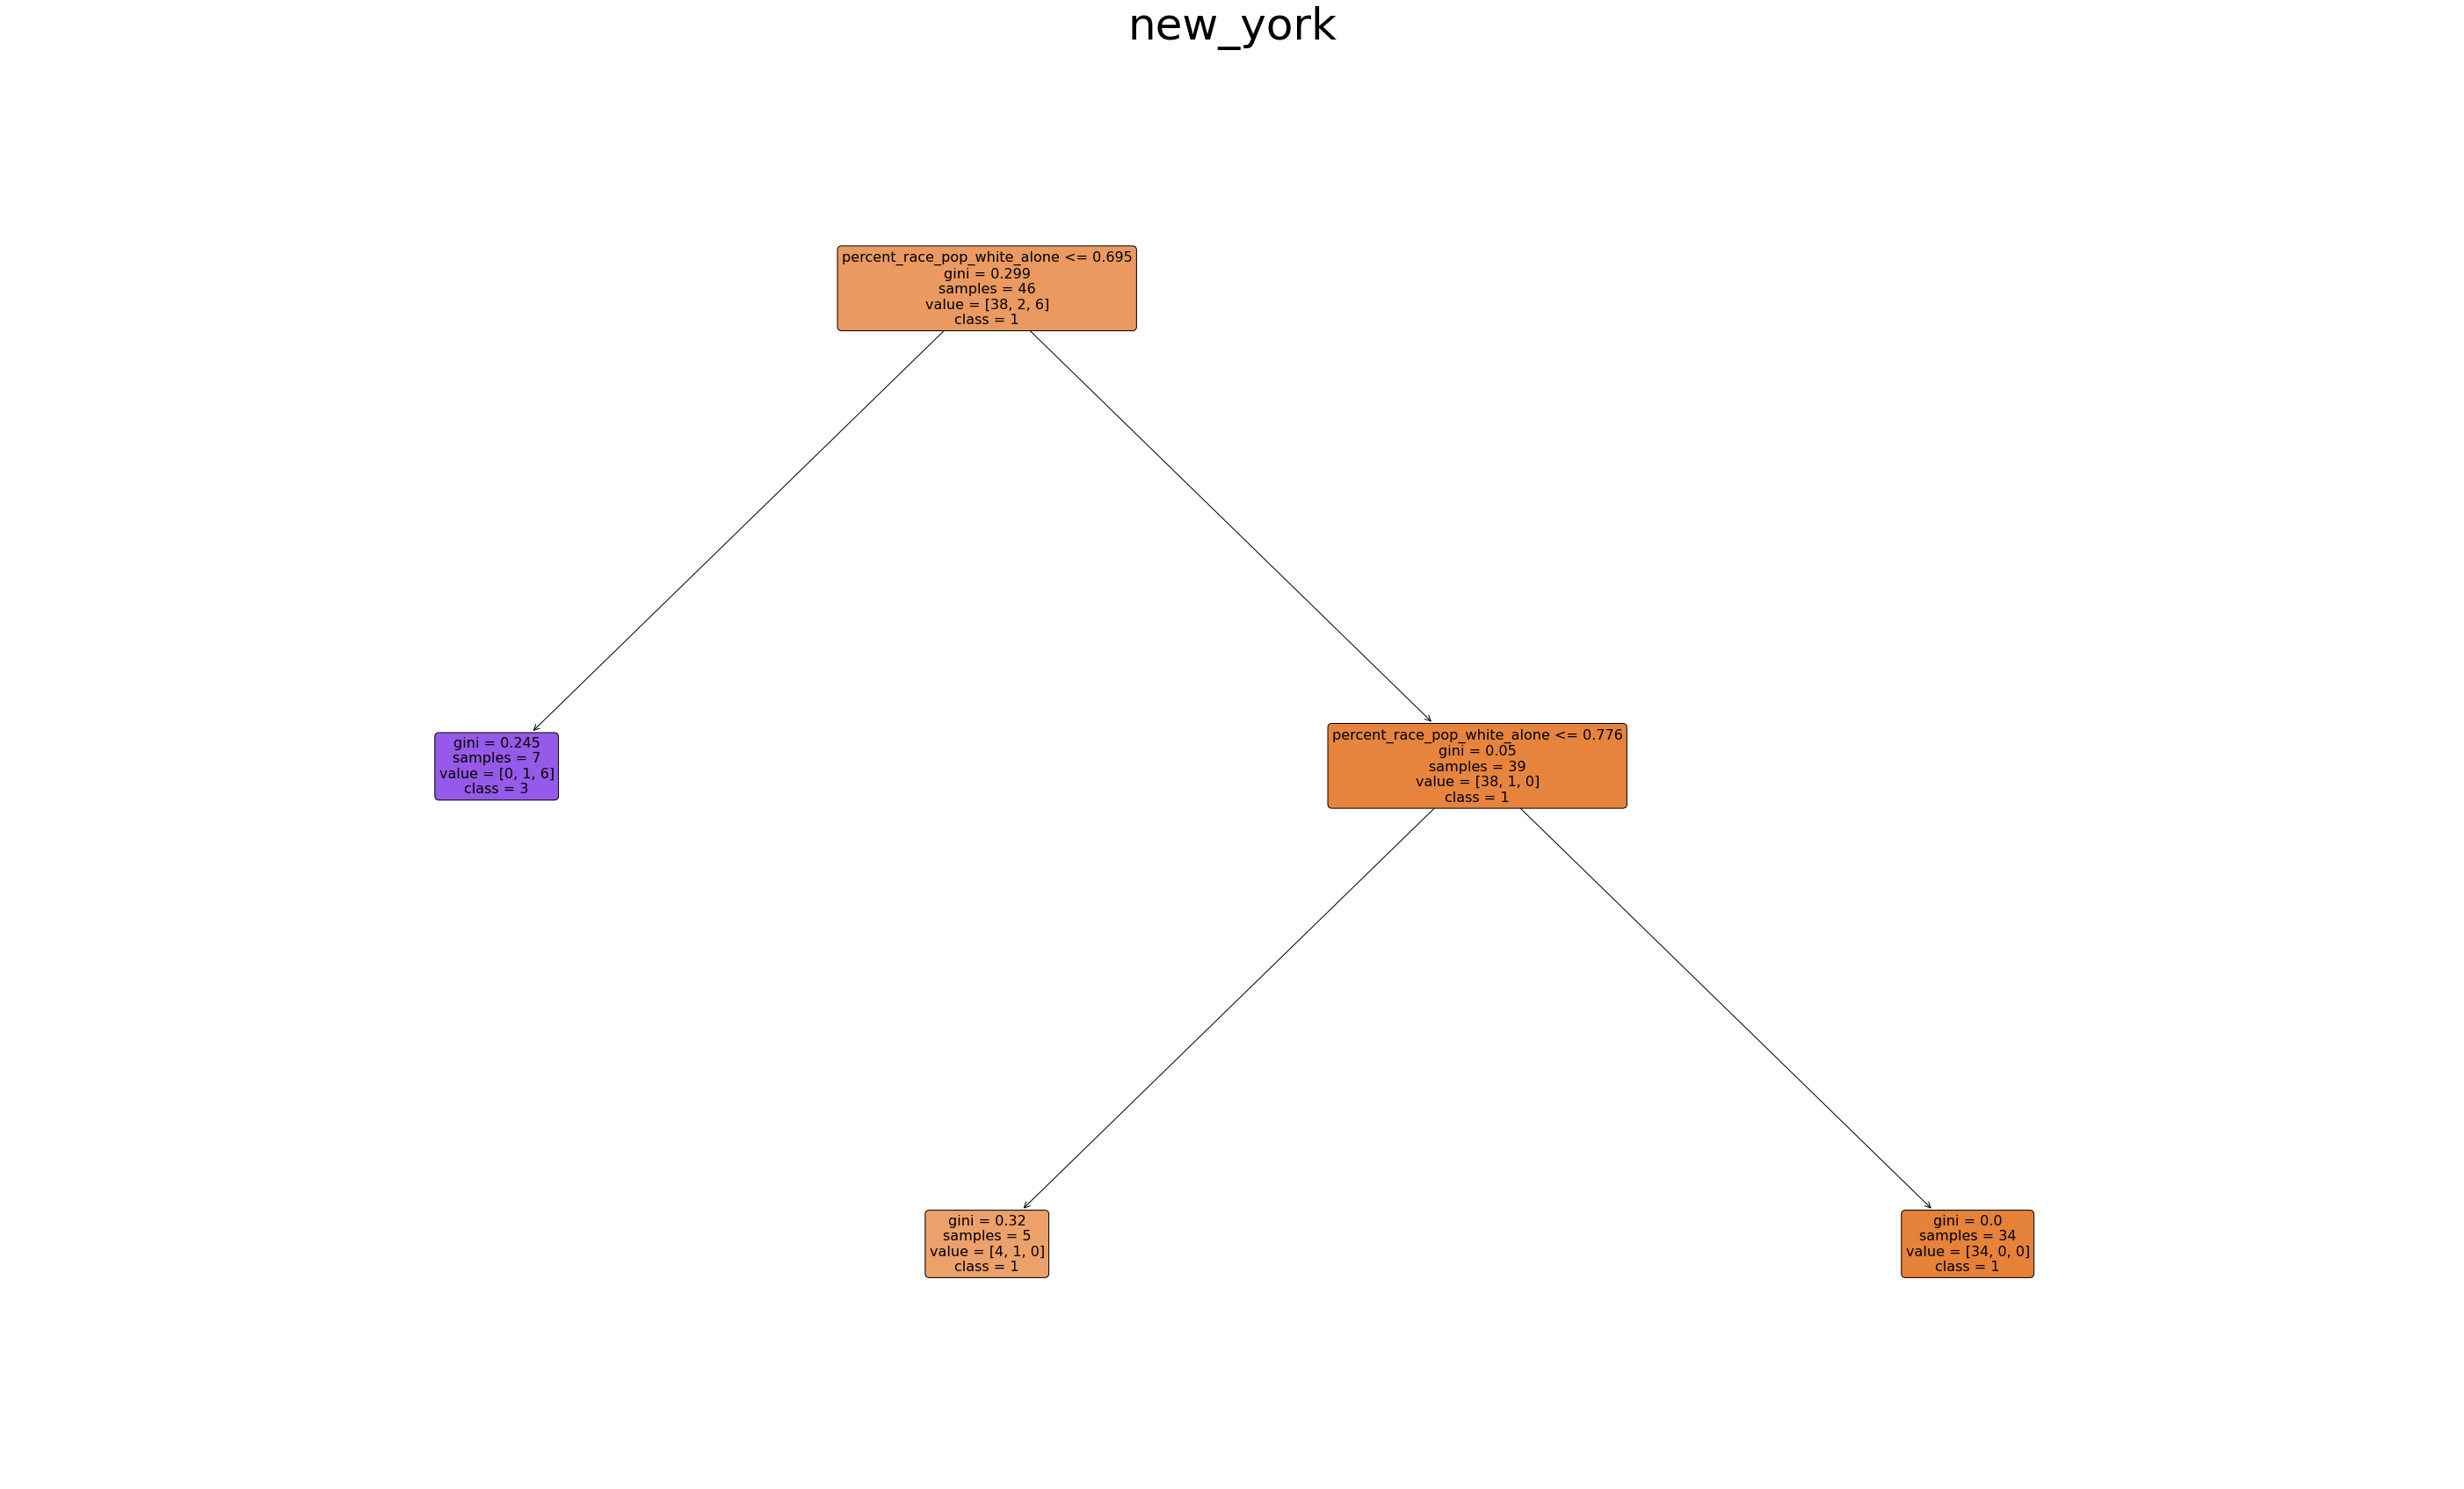

In [192]:
for name, state_df in states:    
    decision_tree_states(name, state_df, params)

In [187]:
new_york['covid_severity'].value_counts()

1    51
3     8
2     3
Name: covid_severity, dtype: int64

## Random Forest Classifier

In [207]:
#making a dunction for decision tree
def random_forest_states(state_name, state_df, params):
    
    '''making a training testing 
    data sets'''
    
    X = state_df[['inc_per_capita_inc_dol',
    'percent_sex_age_pop_male',
    'obes_percent',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_race_pop_asian_alone',
    'percent_inc_hhlds_less_than_99_999',
    'percent_inc_hhlds_100_000_or_more',
    'percent_health_ins_noninst_pop_cov_yes',
    'pop_density',
    'percent_race_pop_white_alone',
    'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
    'percent_race_pop_black_or_african_american_alone',
    'tests_per_100_people']]

    y = state_df['covid_severity']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22, stratify=y)
    
    #instantiating decision tree
    rf = RandomForestClassifier(random_state=22)
    
    #making gridsearchCV
    grid = GridSearchCV(dt, params)
    grid.fit(X_train, y_train)
    
    print(state_name)
    print(f'Score on training set: {grid.score(X_train, y_train)}')
    print(f'Score on testing set: {grid.score(X_test, y_test)}')
    print('\n')
    
    #visualizing the tree

    from sklearn.tree import plot_tree

    # Establish size of figure.
    plt.figure(figsize = (50, 30))

    # Plot our tree.
    plot_tree(grid.best_estimator_,
              feature_names = X_train.columns,
              class_names = ['1', '2', '3'],
              filled = True,
             fontsize=16,
             rounded=True,
             );
    plt.title(state_name, fontsize=50)
    plt.savefig('../img/random_forest'+'_'+state_name)

all_no_texas
Score on training set: 0.7777777777777778
Score on testing set: 0.6301369863013698




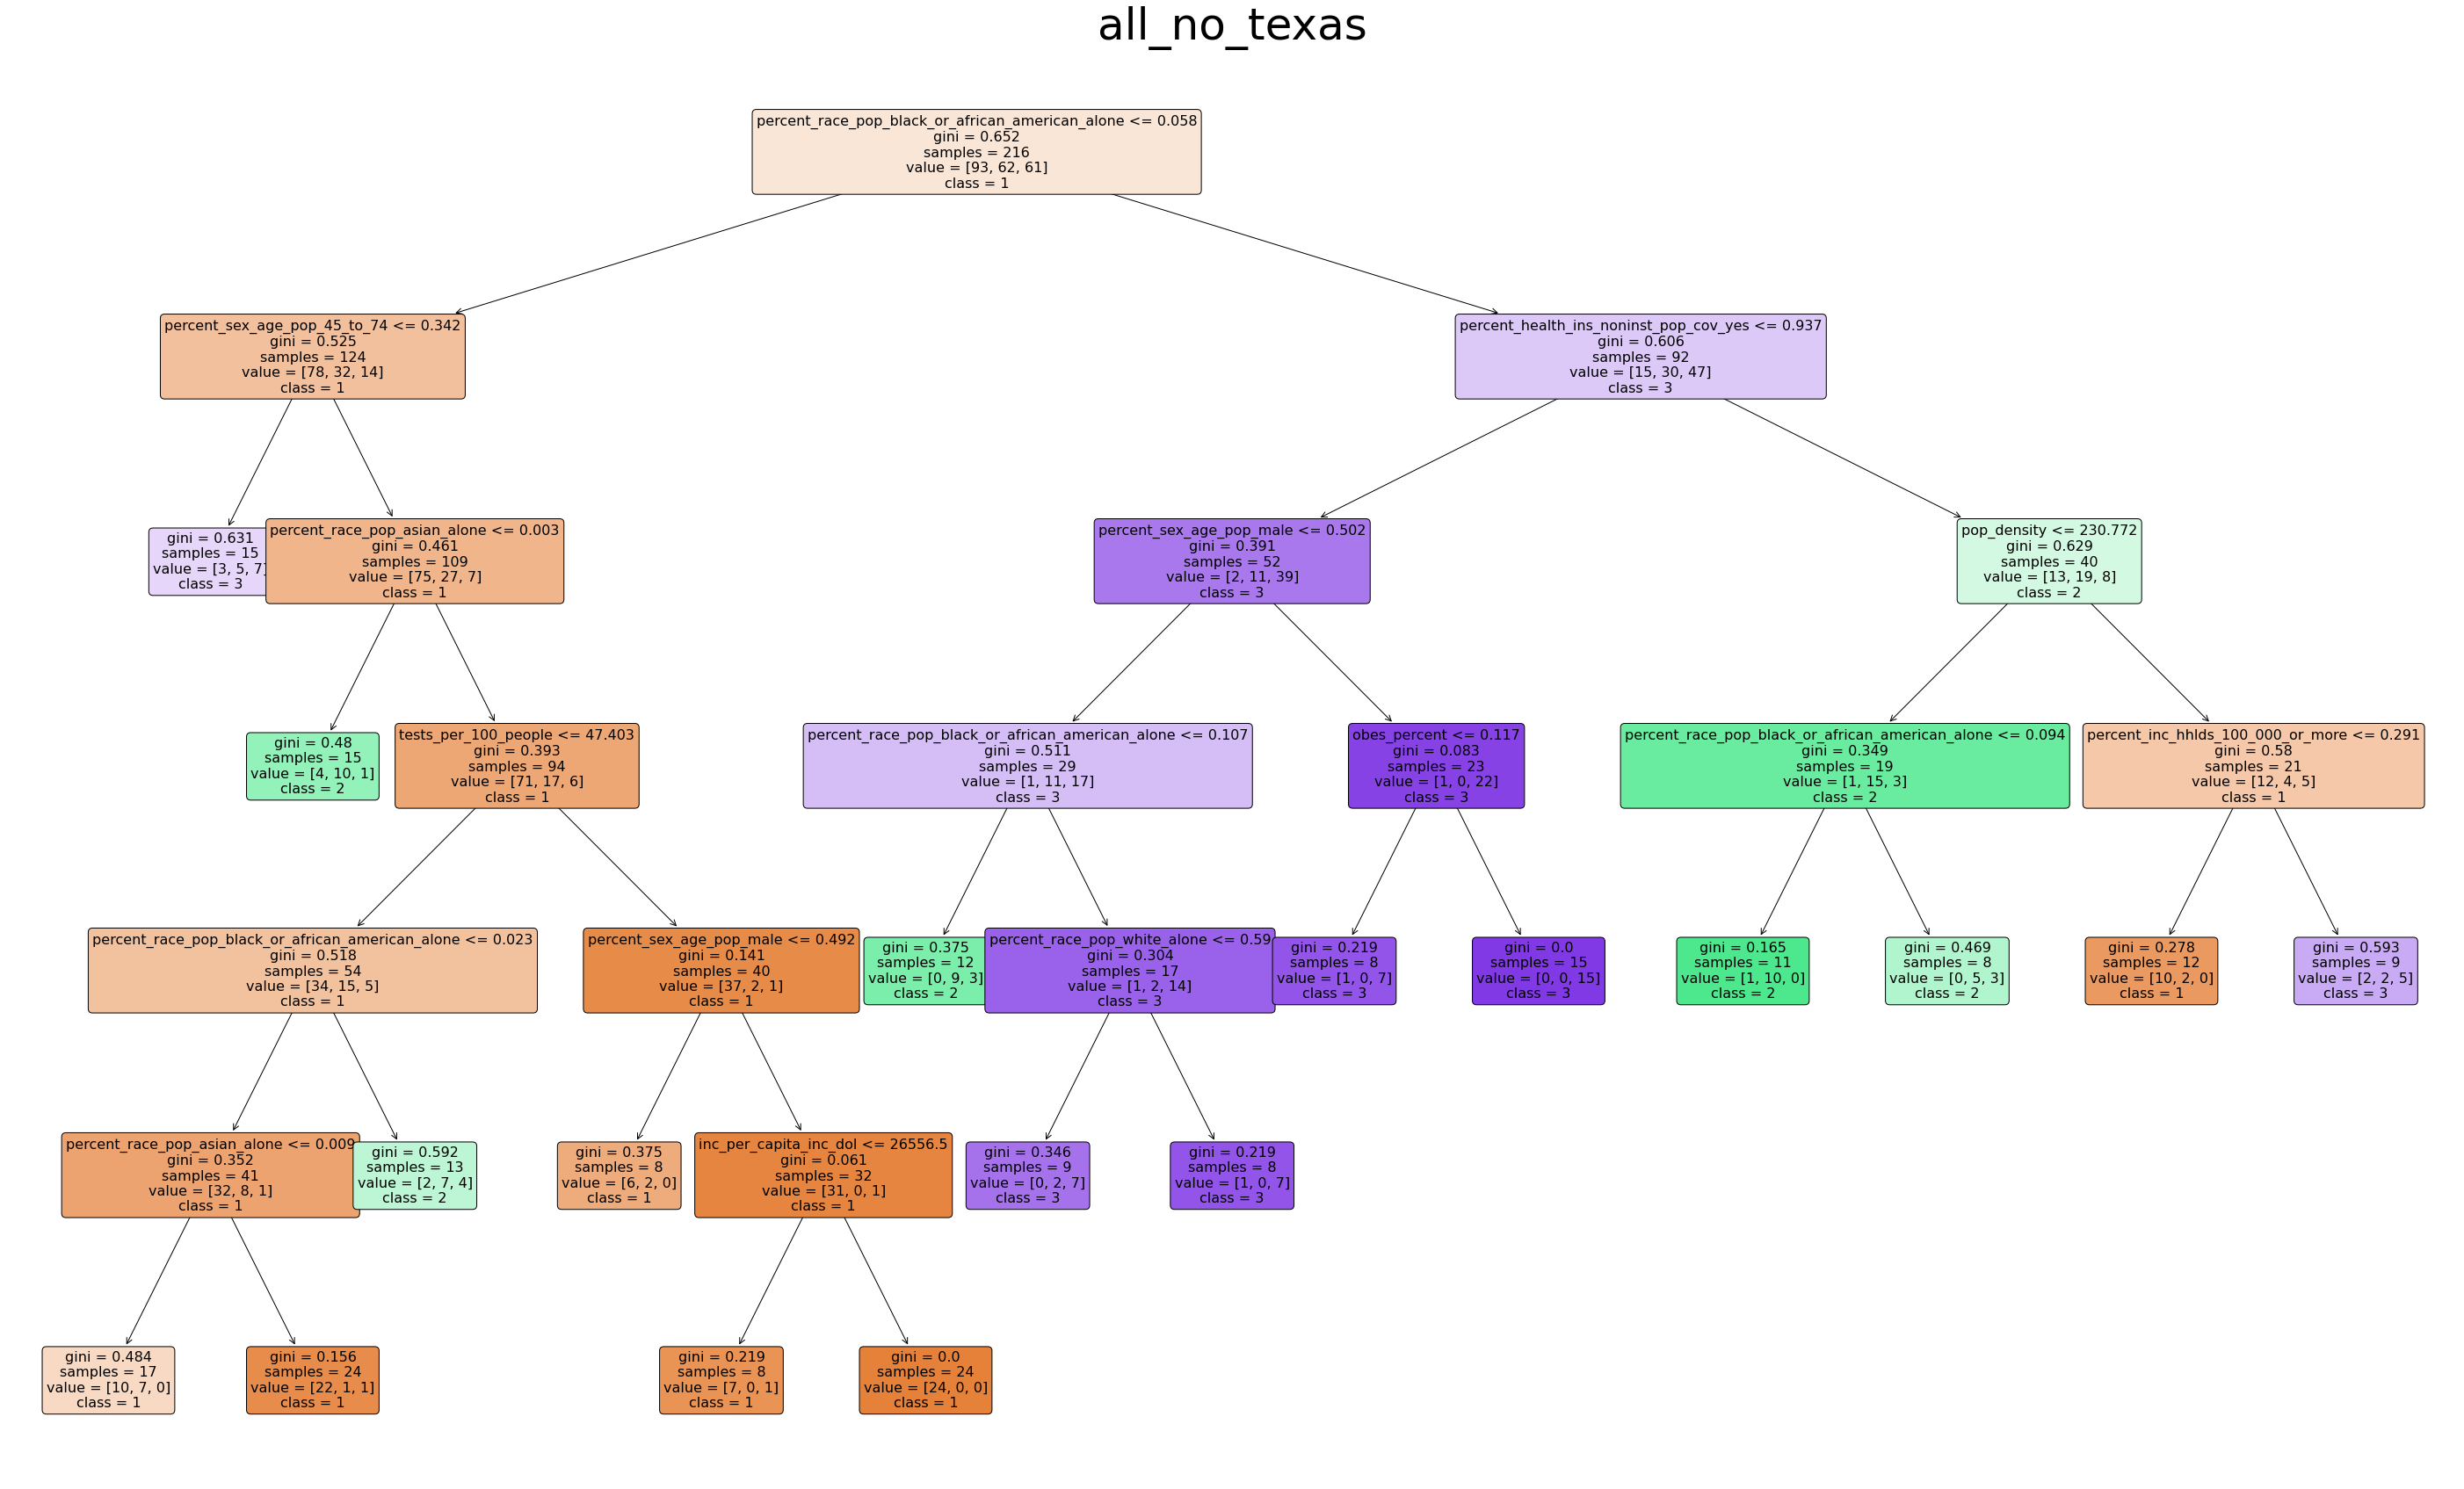

In [208]:
random_forest_states('all_no_texas', data_no_texas, params)

california
Score on training set: 0.9069767441860465
Score on testing set: 0.8666666666666667


illinois
Score on training set: 0.8026315789473685
Score on testing set: 0.38461538461538464


florida
Score on training set: 0.9
Score on testing set: 0.7647058823529411


texas
Score on training set: 0.7210526315789474
Score on testing set: 0.421875


new_york
Score on training set: 0.9565217391304348
Score on testing set: 0.9375




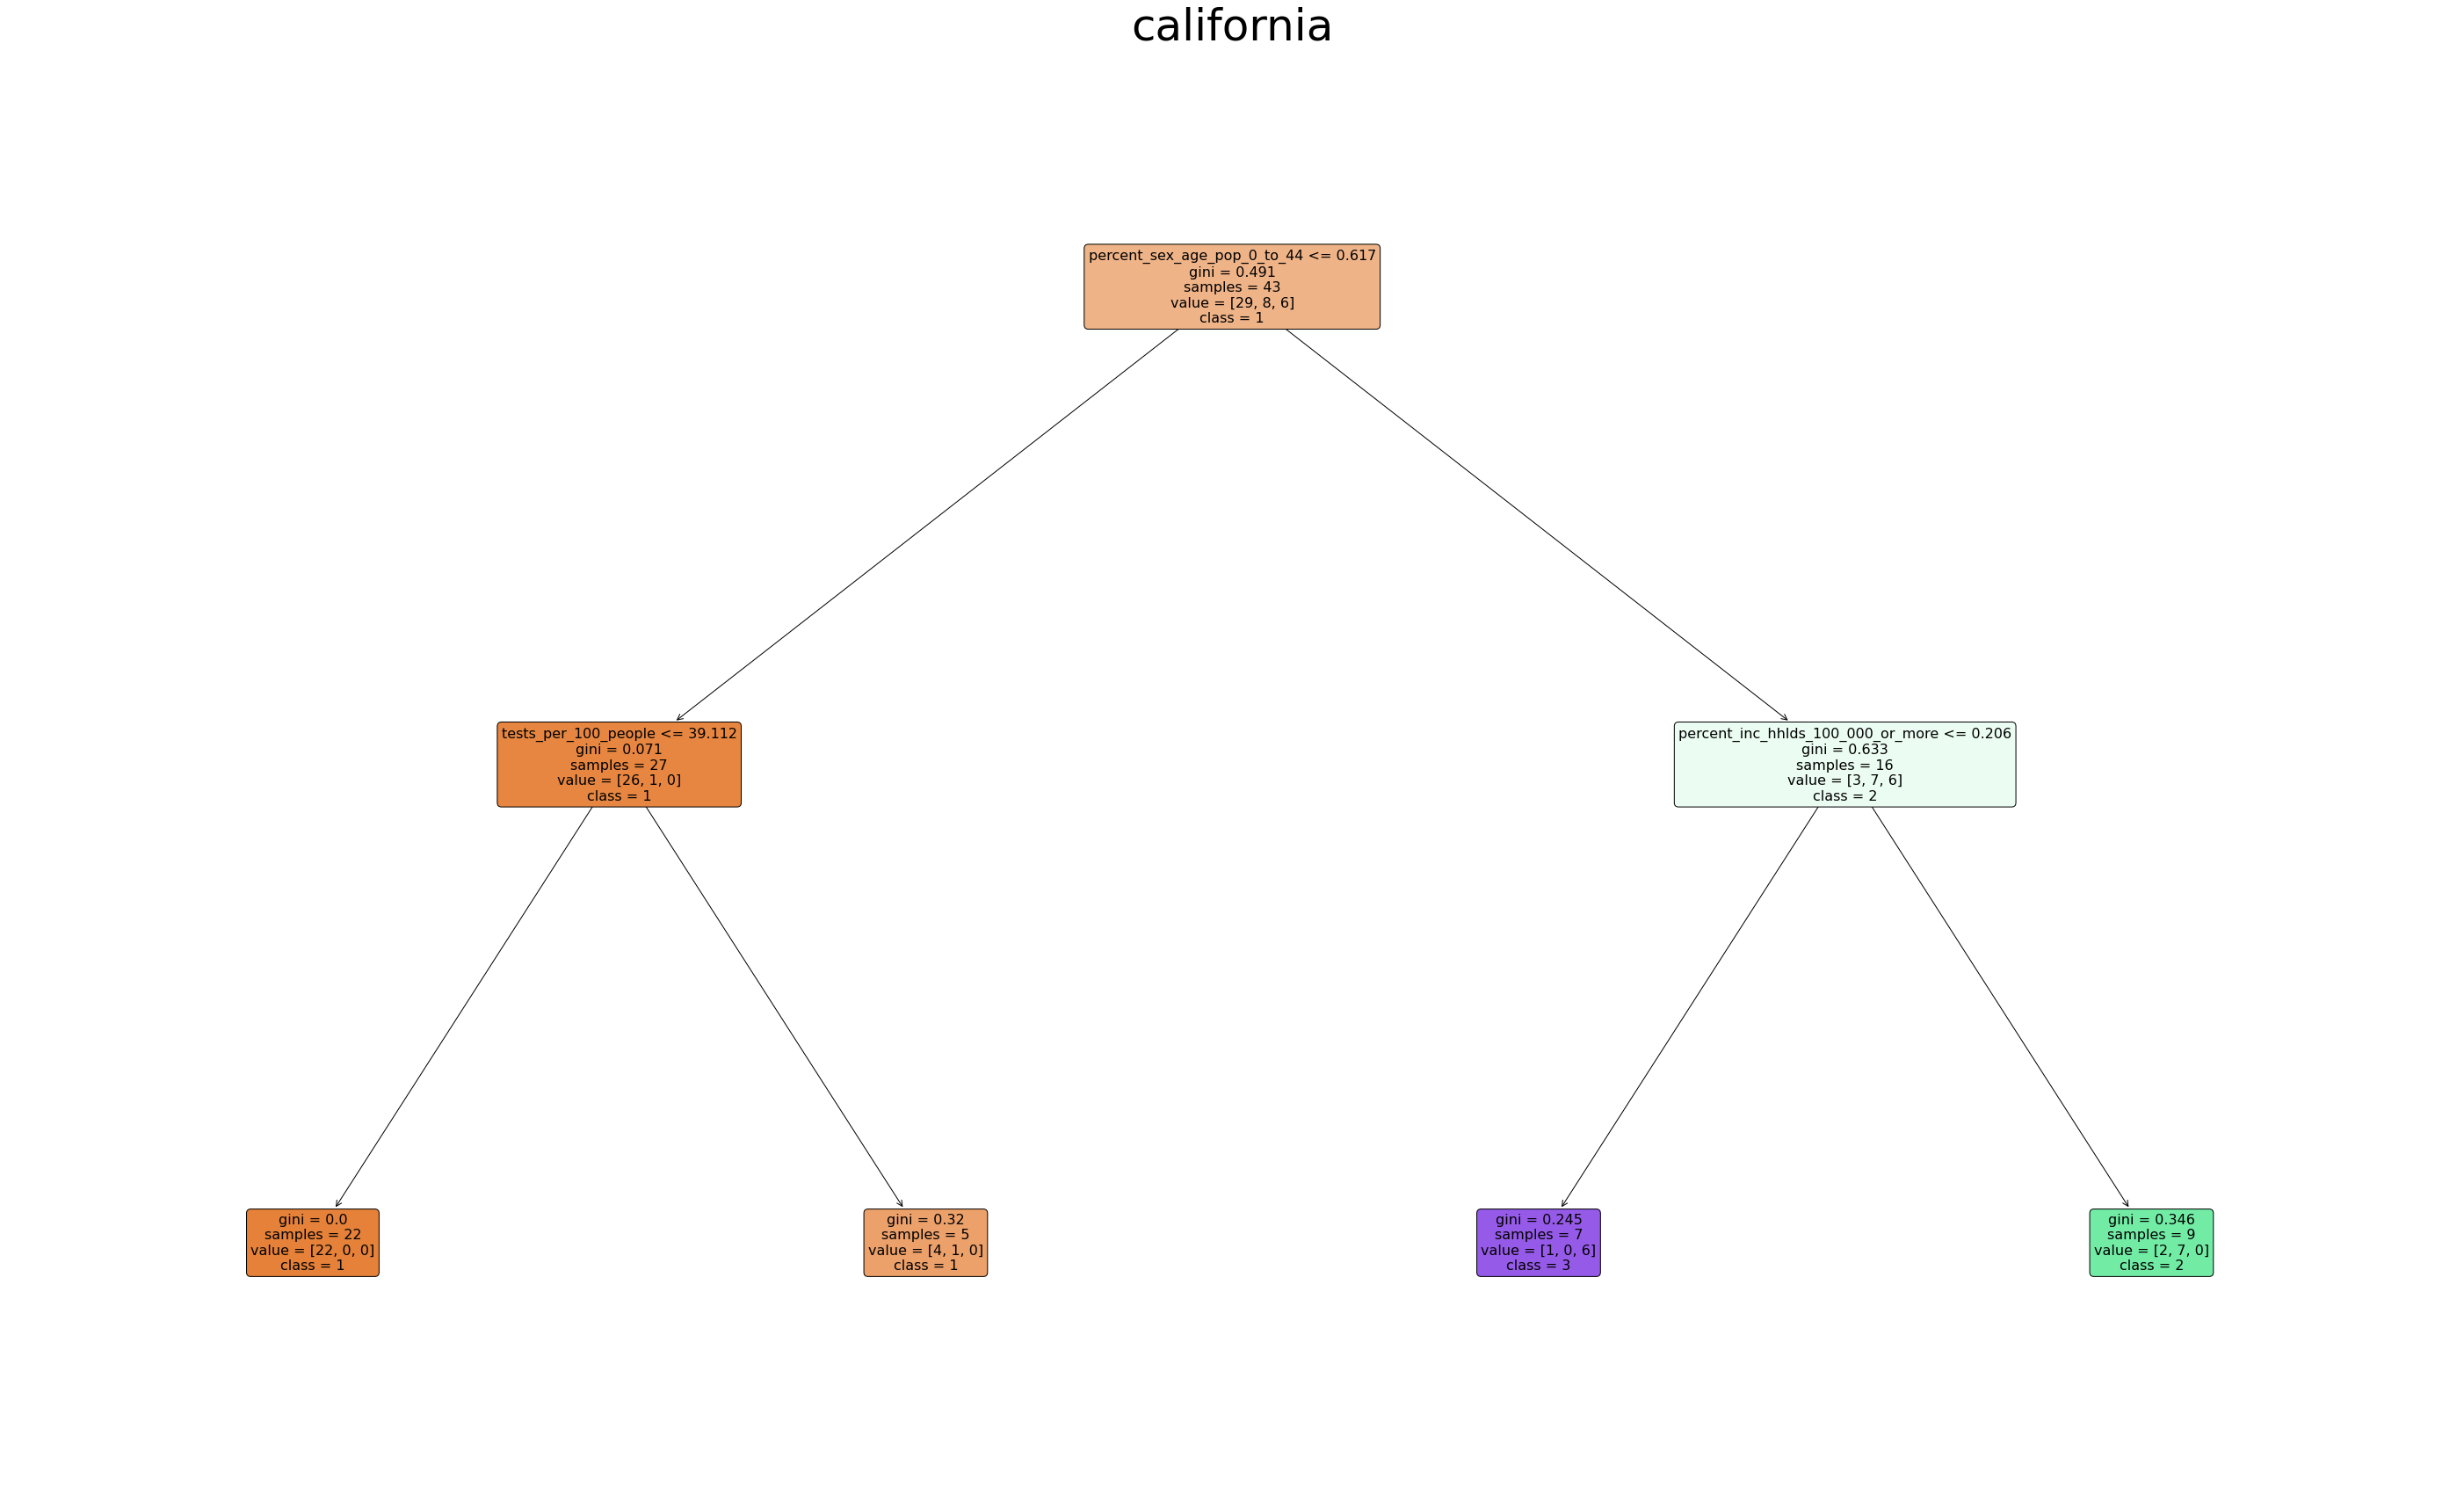

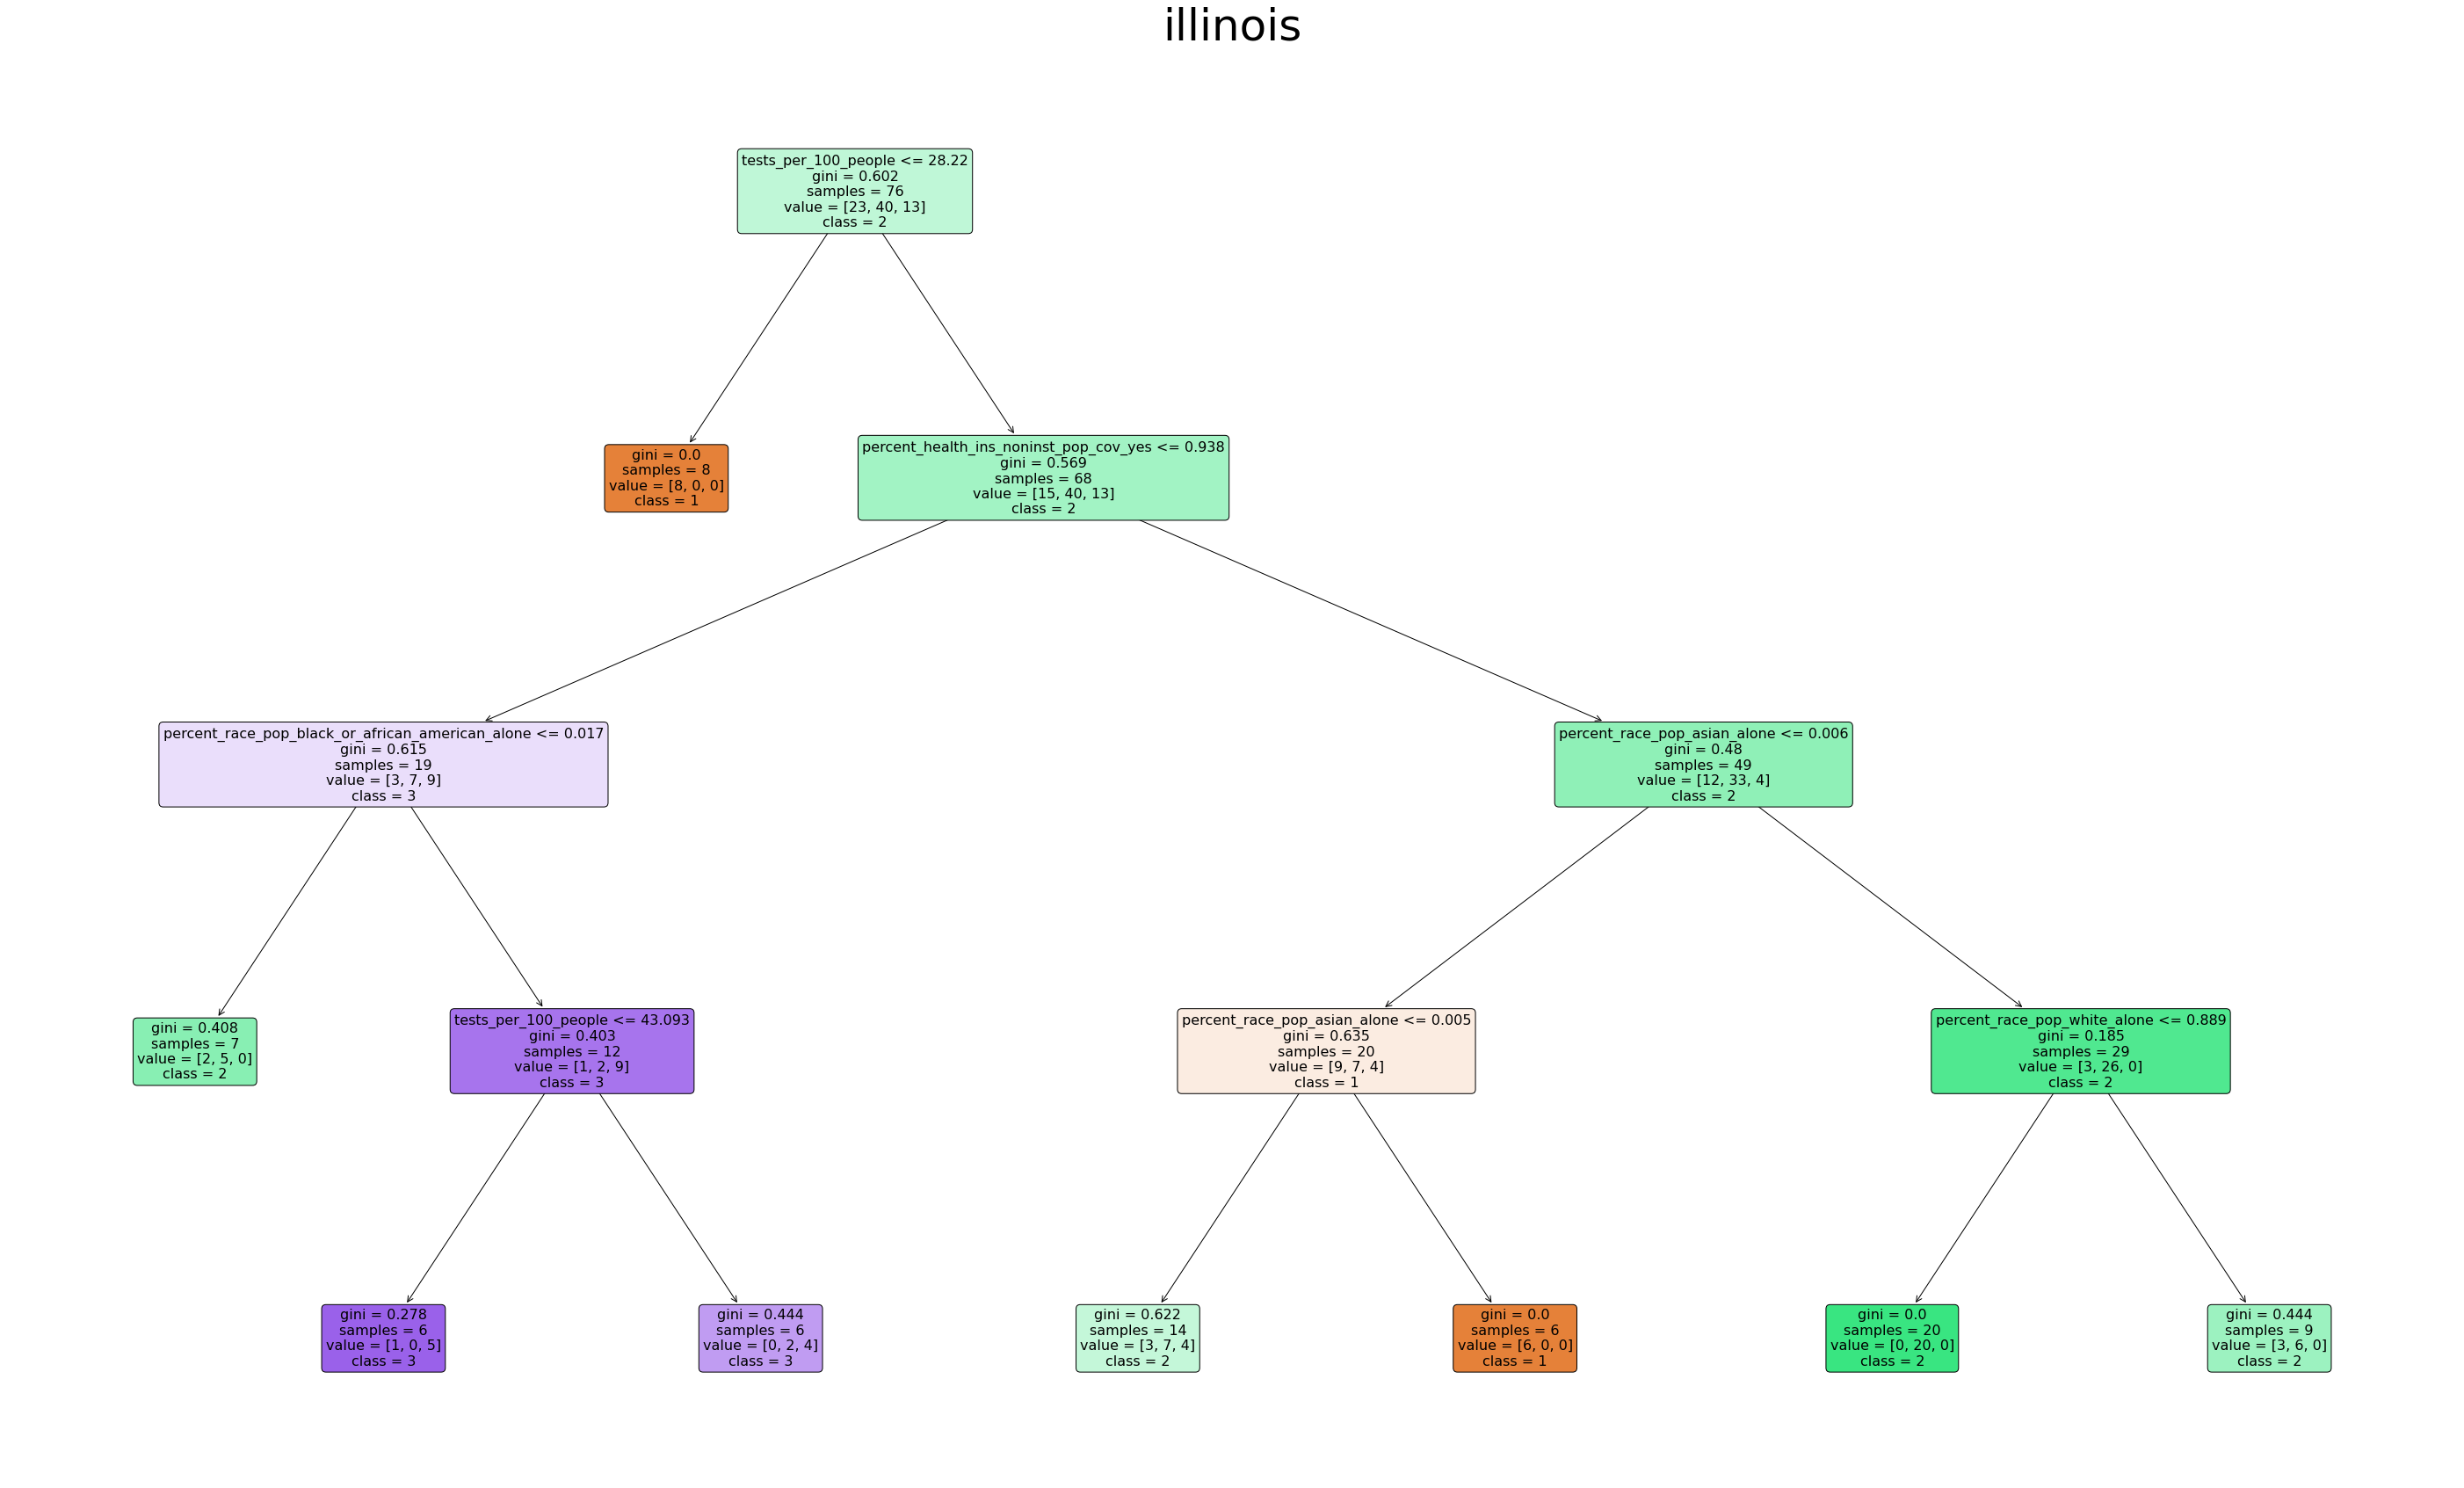

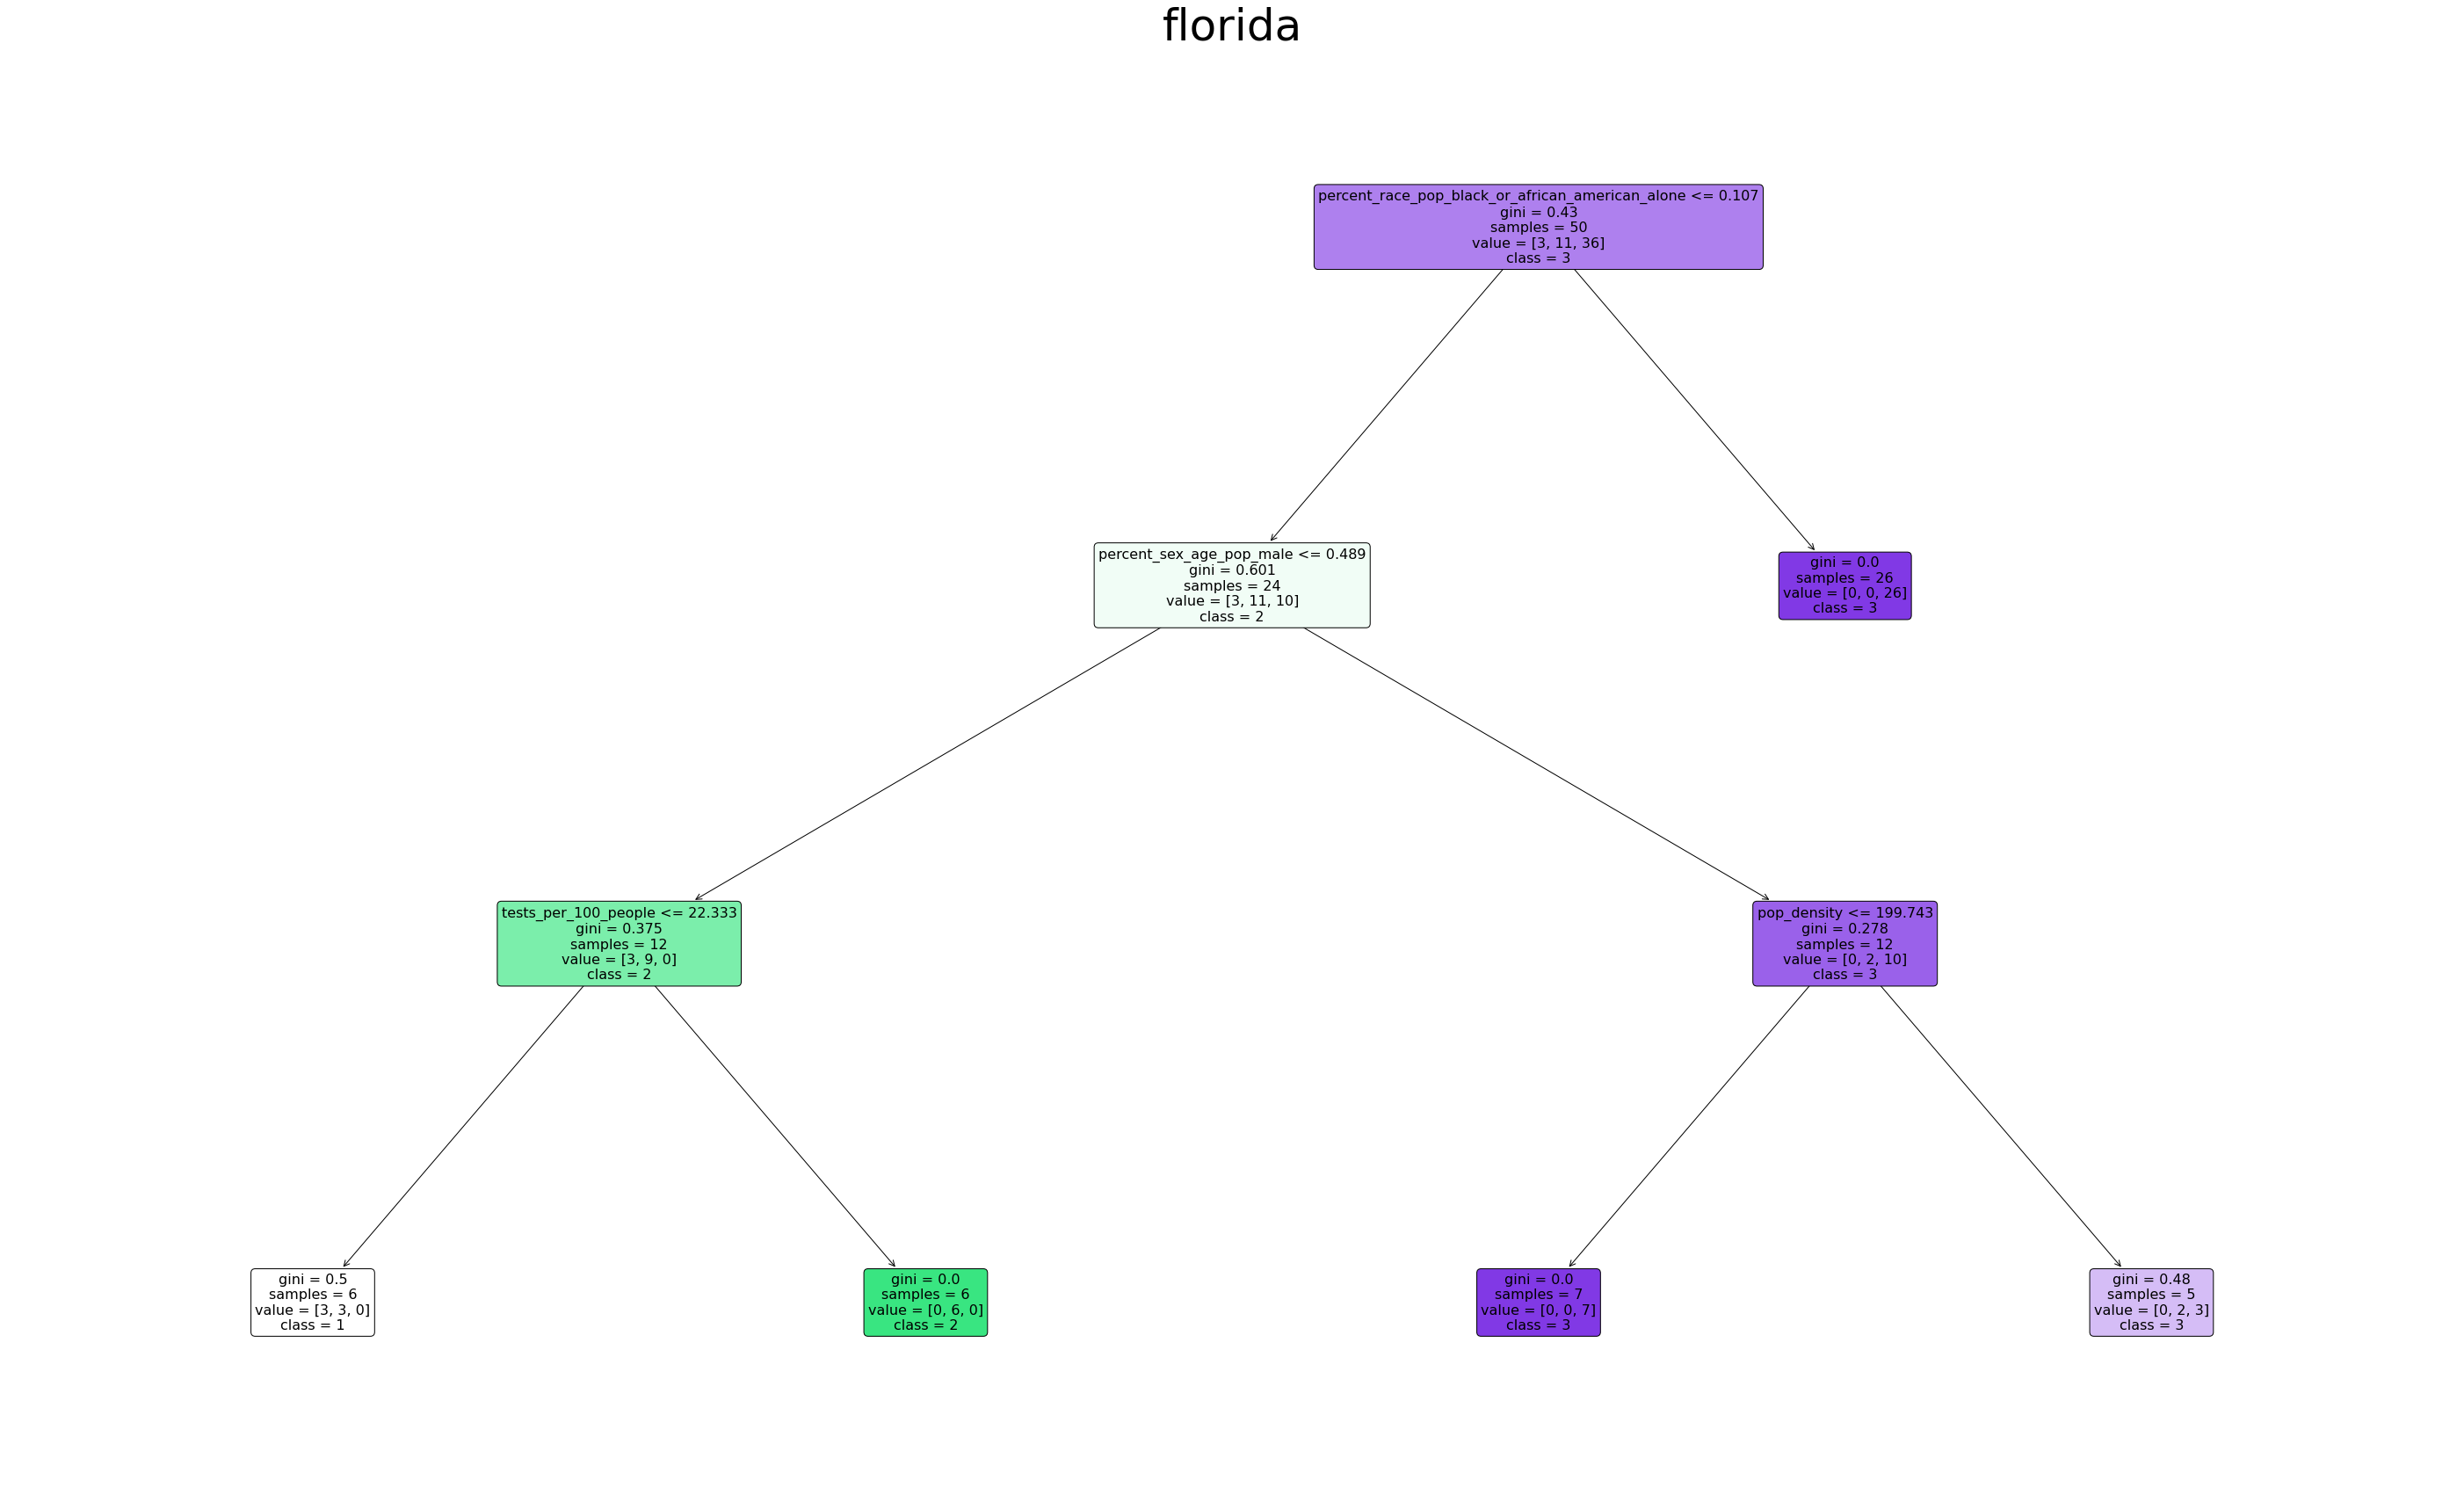

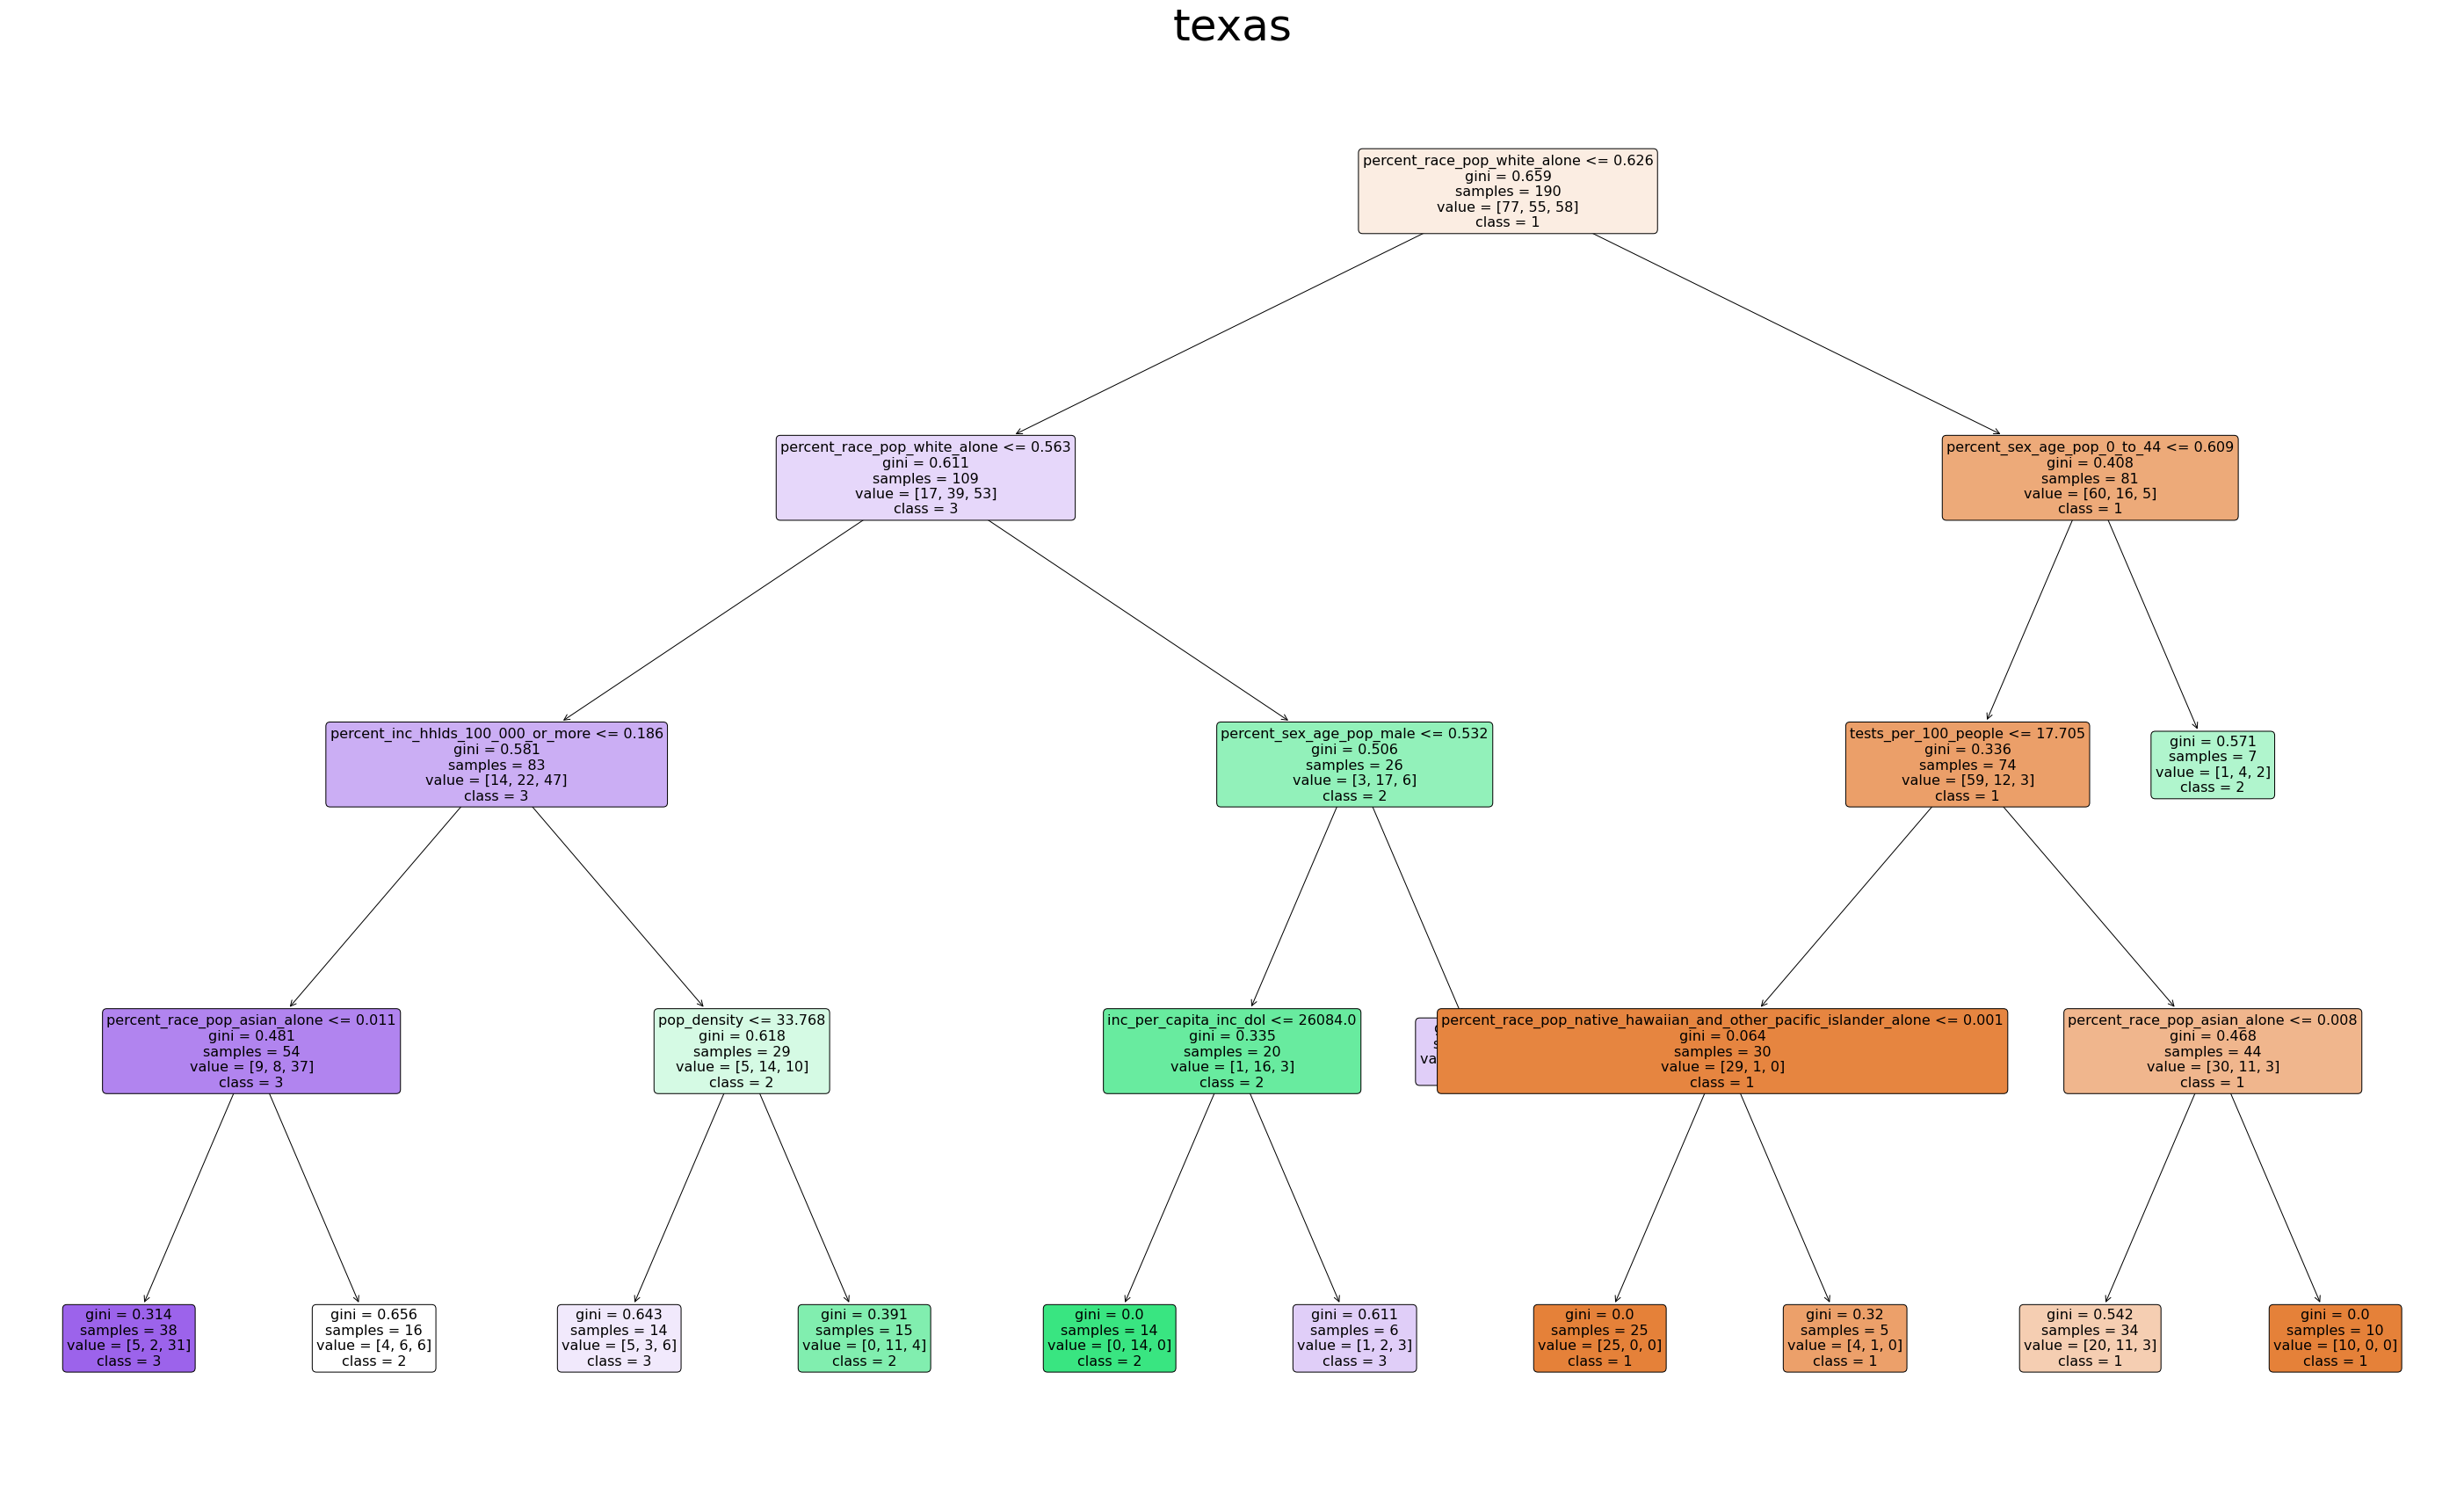

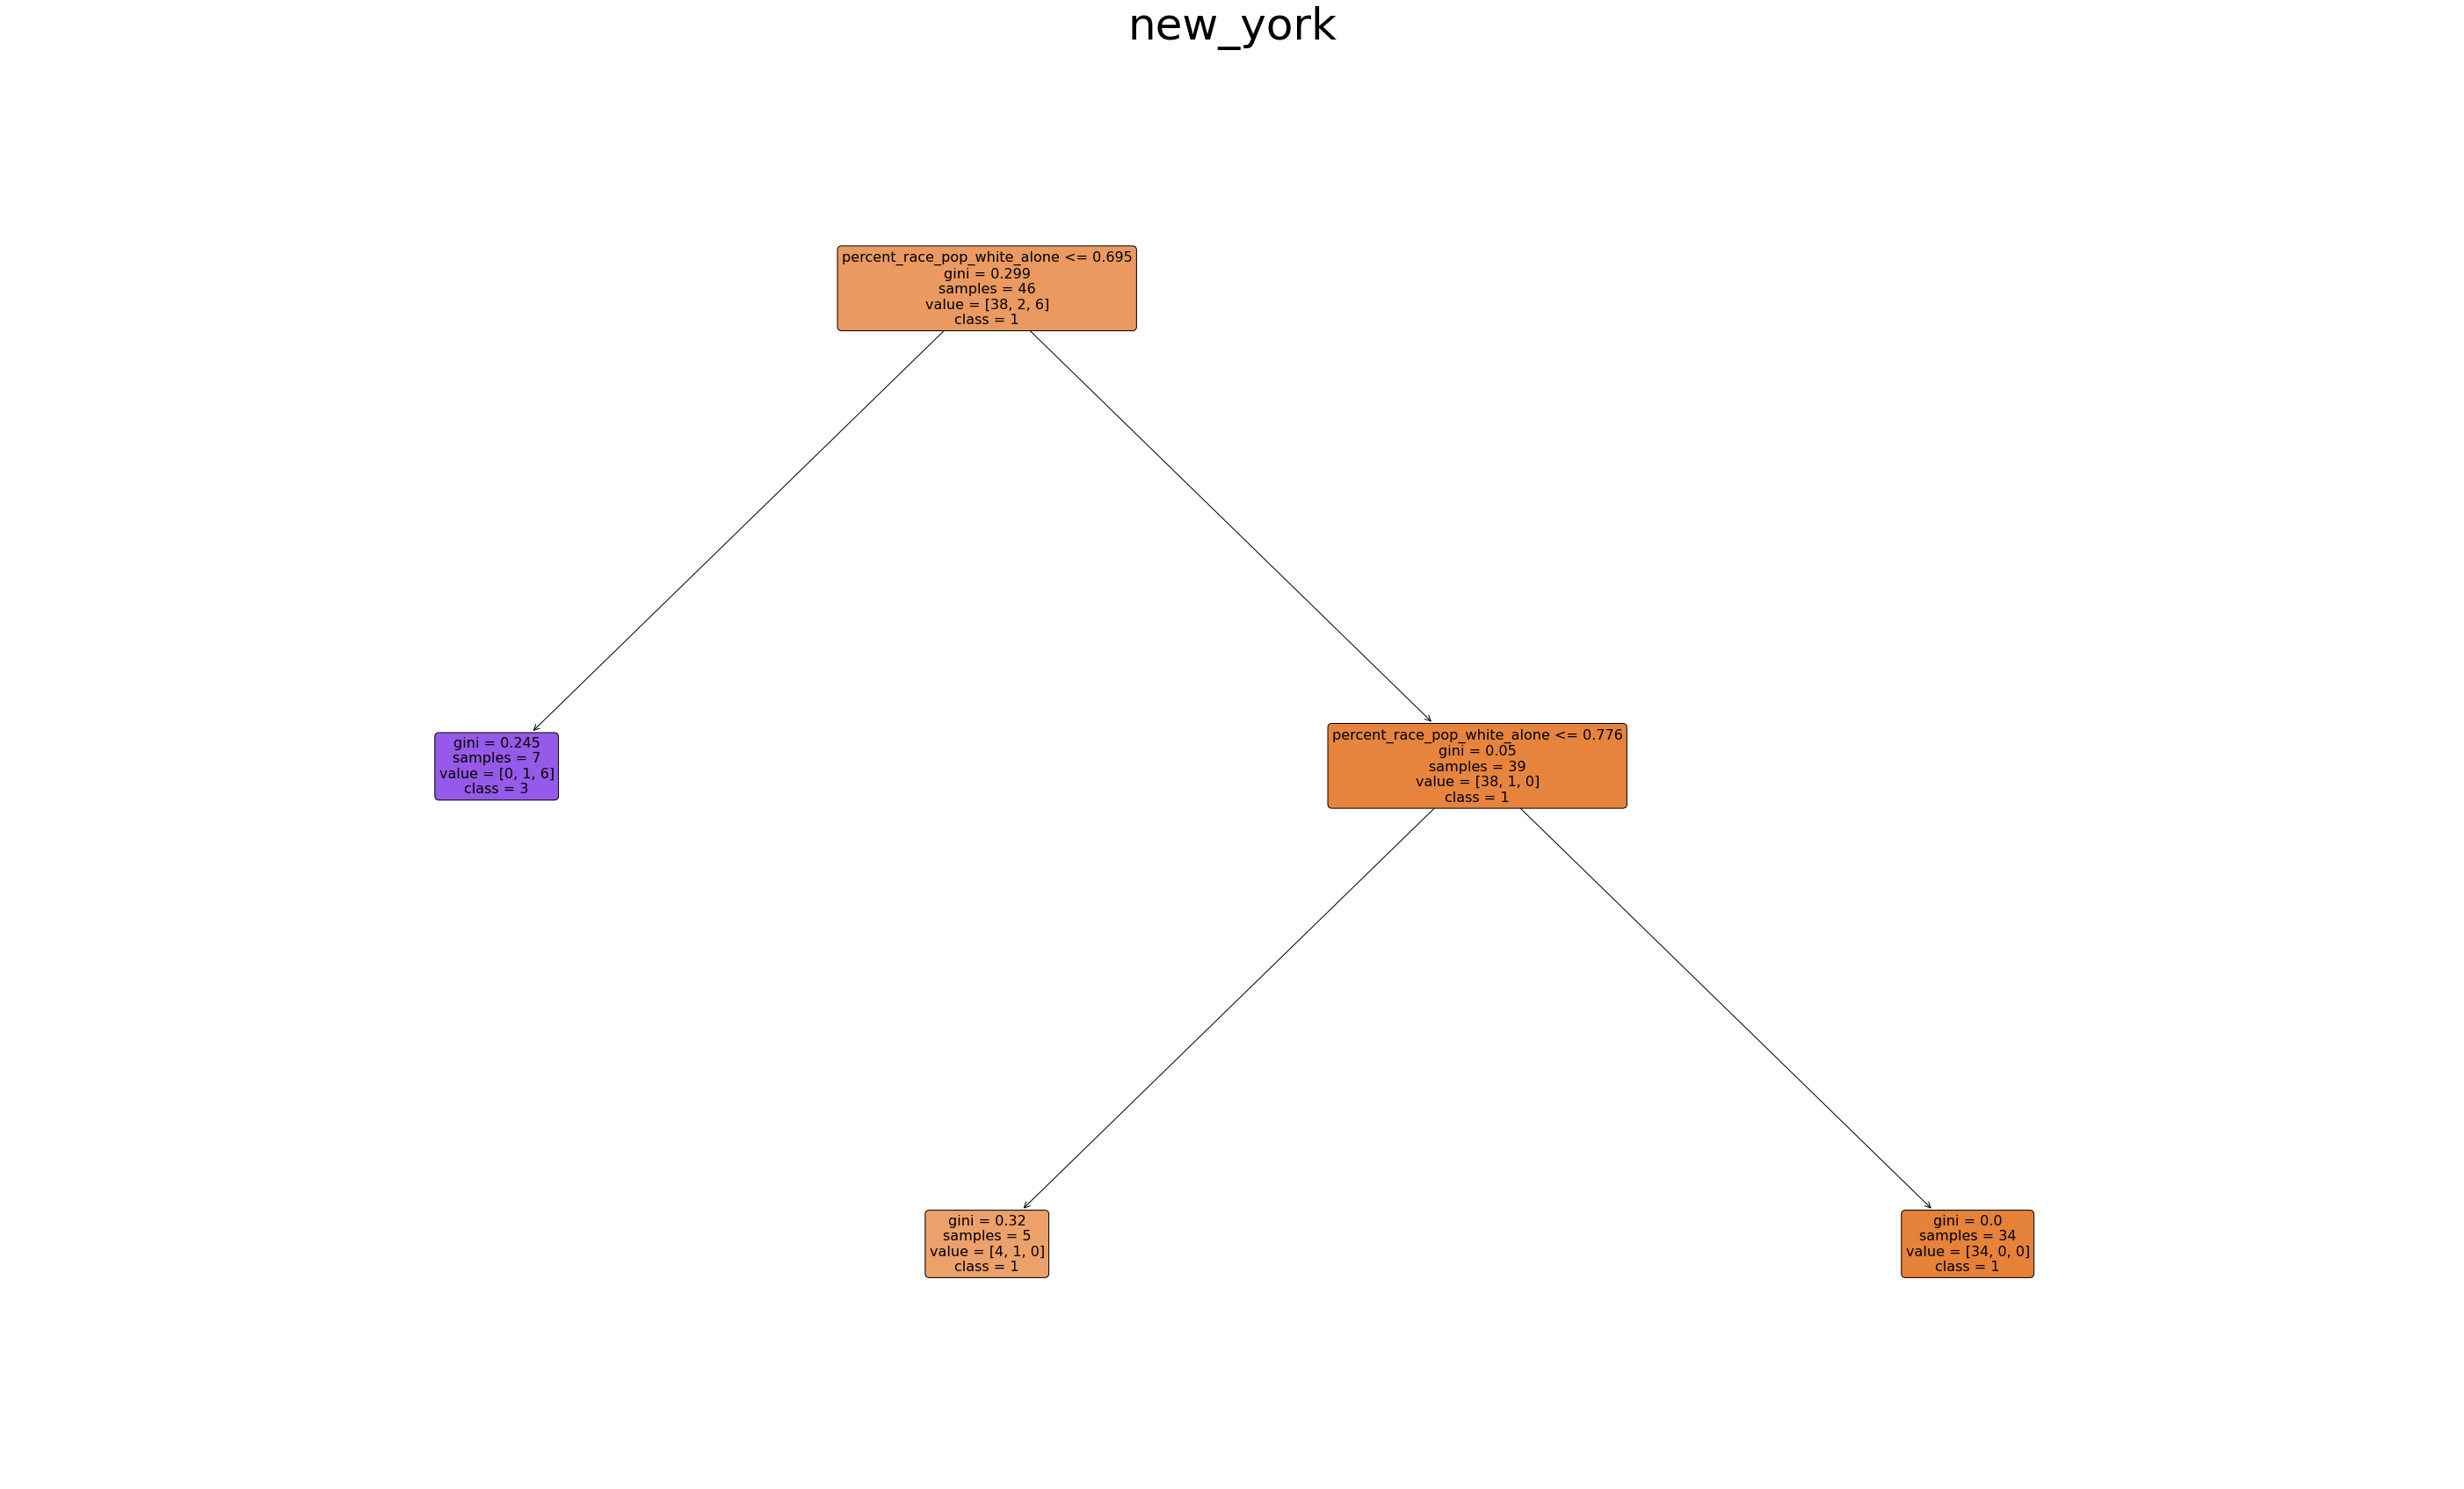

In [209]:
for name, state_df in states:    
    random_forest_states(name, state_df, params)